# Analysis of Fitbit Charge 2 HR for Sleep and Activity Monitoring

## Table of Contents

* [Preprocessing](#preprocessing)
* [Cosinor analysis](#cosinor-analysis)
* [Non-parametric analysis](#np-analysis)
* [Normalized activity values](#normalize)
* [Merged datasets](#merge-datasets)
* [Descriptive statistics](#descriptive-statistics)
* [Correlations](#correlations)
* [Partial correlations covarying for RHR, BMI](#partial-correlations)
* [Bland-Altman plots](#bland-altman-plots)
* [Scatterplots](#scatterplots)
* [Sleep summary statistics](#sleep-summary-stats)
* [PVT](#pvt)


## Preprocessing <a class="anchor" id="preprocessing"></a>

In [1]:
from pathlib import Path
import os
import glob
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
sr = '1T' # 1 minute, downsampling Actiwatch from 30 s to 1 min
recording_period_min = [7, 10]
interpolate_limit = 10 # 10 minute limit

In [3]:
home_dir = str(Path.home())
#data_dir = os.path.join(home_dir, 'Box/CogNeuroLab/Wearables/data/')
data_dir = '/Volumes/schnyer/Megan/Wearables/data/'

act_files = sorted(glob.glob(data_dir + 'actiwatch/act_files/*New_Analysis.csv'))
fit_files = sorted(glob.glob(data_dir + 'fitbit/*minuteStepsNarrow*.csv'))

In [4]:
act = {}

In [13]:
from wearables import preproc

out_dir = os.path.join(data_dir, 'actiwatch')

for in_file in act_files:
    
    record_id = str.split(in_file, "/")[-1][0:5]
    
    if not record_id in act:
#         record_id = record_id + '_repeat'

        act[record_id] = {}

        for ndays in recording_period_min:
            if in_file.endswith('.csv'):
                act[record_id][str(ndays)] = preproc.preproc(in_file, 'actiwatch', sr='1T', start_time_csv = data_dir + 'start_times.csv', end_time_csv = data_dir + 'end_times.csv', truncate=True, write=True, plot=True, recording_period_min=ndays, interpolate_method='linear', interpolate_limit=None)
            np.save(data_dir + '/actiwatch/act_preproc.npy', act)

created output directory /Volumes/schnyer/Megan/Wearables/data/actiwatch/act_files/preproc_2021-08-06/
successfully read Actiware data file
record 10011
10011 missing 0 values out of 20065 total (0.00 percent)
interpolated - now missing 0 values out of 20065 total (0.0 percent)
0
----- success: 0.00 percent NaN, 7 days 00:00:00 recording period
successfully read Actiware data file
record 10011
10011 missing 0 values out of 20065 total (0.00 percent)
interpolated - now missing 0 values out of 20065 total (0.0 percent)
0
----- success: 0.00 percent NaN, 10 days 00:00:00 recording period
successfully read Actiware data file
record 10012
10012 missing 0 values out of 19826 total (0.00 percent)
interpolated - now missing 0 values out of 19826 total (0.0 percent)
0
----- success: 0.00 percent NaN, 7 days 00:00:00 recording period
successfully read Actiware data file
record 10012
10012 missing 0 values out of 19826 total (0.00 percent)
interpolated - now missing 0 values out of 19826 total (0

record 10143
10143 missing 0 values out of 15811 total (0.00 percent)
interpolated - now missing 0 values out of 15811 total (0.0 percent)
0
----- success: 0.00 percent NaN, 10 days 00:00:00 recording period
successfully read Actiware data file
record 10144
10144 missing 0 values out of 15790 total (0.00 percent)
interpolated - now missing 0 values out of 15790 total (0.0 percent)
0
----- success: 0.00 percent NaN, 7 days 00:00:00 recording period
successfully read Actiware data file
record 10144
10144 missing 0 values out of 15790 total (0.00 percent)
interpolated - now missing 0 values out of 15790 total (0.0 percent)
0
----- success: 0.00 percent NaN, 10 days 00:00:00 recording period
successfully read Actiware data file
record 10145
10145 missing 0 values out of 18331 total (0.00 percent)
interpolated - now missing 0 values out of 18331 total (0.0 percent)
0
----- success: 0.00 percent NaN, 7 days 00:00:00 recording period
successfully read Actiware data file
record 10145
10145 mis

----- error: less than 10 days actigraphy data - recording period is 9 
--- ERROR --- 
EXCEPTION IN (/usr/local/lib/python3.9/site-packages/wearables/preproc.py, LINE 144 "error = error + 1"): local variable 'error' referenced before assignment
None
successfully read Actiware data file
record 20103
20103 missing 0 values out of 20116 total (0.00 percent)
interpolated - now missing 0 values out of 20116 total (0.0 percent)
0
----- success: 0.00 percent NaN, 7 days 00:00:00 recording period
successfully read Actiware data file
record 20103
20103 missing 0 values out of 20116 total (0.00 percent)
interpolated - now missing 0 values out of 20116 total (0.0 percent)
0
----- success: 0.00 percent NaN, 10 days 00:00:00 recording period
successfully read Actiware data file
record 20105
20105 missing 0 values out of 15790 total (0.00 percent)
interpolated - now missing 0 values out of 15790 total (0.0 percent)
0
----- success: 0.00 percent NaN, 7 days 00:00:00 recording period
successfully read

0
----- success: 0.00 percent NaN, 7 days 00:00:00 recording period
successfully read Actiware data file
record 20157
20157 missing 0 values out of 15923 total (0.00 percent)
interpolated - now missing 0 values out of 15923 total (0.0 percent)
0
----- success: 0.00 percent NaN, 10 days 00:00:00 recording period
successfully read Actiware data file
record 20163
20163 missing 0 values out of 15241 total (0.00 percent)
interpolated - now missing 0 values out of 15241 total (0.0 percent)
0
----- success: 0.00 percent NaN, 7 days 00:00:00 recording period
successfully read Actiware data file
record 20163
20163 missing 0 values out of 15241 total (0.00 percent)
interpolated - now missing 0 values out of 15241 total (0.0 percent)
0
----- success: 0.00 percent NaN, 10 days 00:00:00 recording period
successfully read Actiware data file
record 20168
20168 missing 0 values out of 16861 total (0.00 percent)
interpolated - now missing 0 values out of 16861 total (0.0 percent)
0
----- success: 0.00 

In [24]:
fit = {}

In [15]:
if not fit_files[-4].endswith('beiwe.csv'):
    print("not beiwe")

In [25]:
from wearables import preproc

out_dir = os.path.join(data_dir, 'fitbit')

for in_file in fit_files:
    record_id = str.split(in_file, "/")[-1][3:8]
    print(record_id)
    
    if not record_id in fit:
#         record_id = record_id + '_repeat'
        
        fit[str(record_id)] = {}

        for ndays in recording_period_min:
            if in_file.endswith('.csv'):
                fit[str(record_id)][str(ndays)] = preproc.preproc(in_file, 'fitbit', sr='1T', start_time_csv = data_dir + 'start_times.csv', end_time_csv = data_dir + 'end_times.csv', truncate=True, write=True, plot=True, recording_period_min=ndays, interpolate_method='linear', interpolate_limit=None)
                np.save(data_dir + '/fitbit/fit_preproc.npy', fit)

10011
record 10011
10011 missing 0 values out of 20065 total (0.00 percent)
interpolated - now missing 0 values out of 20065 total (0.0 percent)
0
----- success: 0.00 percent NaN, 7 days 00:00:00 recording period
record 10011
10011 missing 0 values out of 20065 total (0.00 percent)
interpolated - now missing 0 values out of 20065 total (0.0 percent)
0
----- success: 0.00 percent NaN, 10 days 00:00:00 recording period
10011
10012
record 10012
10012 missing 0 values out of 9559 total (0.00 percent)
interpolated - now missing 0 values out of 9559 total (0.0 percent)
0
----- success: 0.00 percent NaN, 6 days 15:18:00 recording period
record 10012
10012 missing 0 values out of 9559 total (0.00 percent)
interpolated - now missing 0 values out of 9559 total (0.0 percent)
0
----- success: 0.00 percent NaN, 6 days 15:18:00 recording period
10014
record 10014
10014 missing 0 values out of 9529 total (0.00 percent)
interpolated - now missing 0 values out of 9529 total (0.0 percent)
0
----- succes

record 10146
10146 missing 0 values out of 6578 total (0.00 percent)
interpolated - now missing 0 values out of 6578 total (0.0 percent)
0
----- success: 0.00 percent NaN, 4 days 13:37:00 recording period
10147
record 10147
10147 missing 0 values out of 16081 total (0.00 percent)
interpolated - now missing 0 values out of 16081 total (0.0 percent)
0
----- success: 0.00 percent NaN, 7 days 00:00:00 recording period
record 10147
10147 missing 0 values out of 16081 total (0.00 percent)
interpolated - now missing 0 values out of 16081 total (0.0 percent)
0
----- success: 0.00 percent NaN, 10 days 00:00:00 recording period
10148
record 10148
10148 missing 0 values out of 15826 total (0.00 percent)
interpolated - now missing 0 values out of 15826 total (0.0 percent)
0
----- success: 0.00 percent NaN, 7 days 00:00:00 recording period
record 10148
10148 missing 0 values out of 15826 total (0.00 percent)
interpolated - now missing 0 values out of 15826 total (0.0 percent)
0
----- success: 0.00 

0
----- success: 0.00 percent NaN, 10 days 00:00:00 recording period
20129
record 20129


/usr/local/lib/python3.9/site-packages/wearables/preproc.py:160: RuntimeWarning: invalid value encountered in long_scalars
  record_id, data.isnull().sum(), len(data), data.isnull().sum() / len(data) * 100))
/usr/local/lib/python3.9/site-packages/wearables/preproc.py:183: RuntimeWarning: invalid value encountered in long_scalars
  (data.isnull().sum(), len(data), data.isnull().sum() / len(data) * 100))


20129 missing 0 values out of 0 total (nan percent)
interpolated - now missing 0 values out of 0 total (nan percent)
--- ERROR --- 
EXCEPTION IN (/usr/local/lib/python3.9/site-packages/wearables/preproc.py, LINE 190 "period = end_time - start_time"): unsupported operand type(s) for -: 'NoneType' and 'Timestamp'
None
record 20129
20129 missing 0 values out of 0 total (nan percent)
interpolated - now missing 0 values out of 0 total (nan percent)
--- ERROR --- 
EXCEPTION IN (/usr/local/lib/python3.9/site-packages/wearables/preproc.py, LINE 190 "period = end_time - start_time"): unsupported operand type(s) for -: 'NoneType' and 'Timestamp'
None


/usr/local/lib/python3.9/site-packages/wearables/preproc.py:160: RuntimeWarning: invalid value encountered in long_scalars
  record_id, data.isnull().sum(), len(data), data.isnull().sum() / len(data) * 100))
/usr/local/lib/python3.9/site-packages/wearables/preproc.py:183: RuntimeWarning: invalid value encountered in long_scalars
  (data.isnull().sum(), len(data), data.isnull().sum() / len(data) * 100))


20131
record 20131
20131 missing 0 values out of 18001 total (0.00 percent)
interpolated - now missing 0 values out of 18001 total (0.0 percent)
0
----- success: 0.00 percent NaN, 7 days 00:00:00 recording period
record 20131
20131 missing 0 values out of 18001 total (0.00 percent)
interpolated - now missing 0 values out of 18001 total (0.0 percent)
0
----- success: 0.00 percent NaN, 10 days 00:00:00 recording period
20142
record 20142
20142 missing 0 values out of 17094 total (0.00 percent)
interpolated - now missing 0 values out of 17094 total (0.0 percent)
0
----- success: 0.00 percent NaN, 7 days 00:00:00 recording period
record 20142
20142 missing 0 values out of 17094 total (0.00 percent)
interpolated - now missing 0 values out of 17094 total (0.0 percent)
0
----- success: 0.00 percent NaN, 10 days 00:00:00 recording period
20154
record 20154
20154 missing 0 values out of 17970 total (0.00 percent)
interpolated - now missing 0 values out of 17970 total (0.0 percent)
0
----- succe

In [26]:
fit['20157']['10']


Time
2020-10-08 07:00:00    0
2020-10-08 07:01:00    0
2020-10-08 07:02:00    0
2020-10-08 07:03:00    0
2020-10-08 07:04:00    0
                      ..
2020-10-18 06:56:00    0
2020-10-18 06:57:00    0
2020-10-18 06:58:00    0
2020-10-18 06:59:00    0
2020-10-18 07:00:00    0
Freq: T, Name: Activity, Length: 14401, dtype: int64

## Cosinor Analysis <a class="anchor" id="cosinor-analysis"></a>

Load saved npy files to save time.

In [27]:
act = np.load(data_dir + '/actiwatch/act_preproc.npy', allow_pickle=True)[()]
fit = np.load(data_dir + '/fitbit/fit_preproc.npy', allow_pickle=True)[()]

In [28]:
cr_measures = ['actmin', 'amp', 'alpha', 'beta', 'phi']
cols = [col + "_" + str(ndays) for ndays in recording_period_min for col in cr_measures]

In [29]:
str.split(act_files[2], "/")[-1]

'10012_10_18_2019_3_30_00_PM_New_Analysis.csv'

In [30]:
fit.keys()

dict_keys(['10011', '10012', '10014', '10016', '10023', '10024', '10025', '10033', '10035', '10038', '10040', '10045', '10049', '10062', '10139', '10140', '10143', '10144', '10145', '10146', '10147', '10148', '10149', '10150', '10151', '10152', '10159', '20076', '20103', '20105', '20108', '20113', '20115', '20120', '20122', '20123', '20124', '20125', '20127', '20129', '20131', '20142', '20154', '20155', '20157', '20163', '20168', '20177', '20178', '20180', '20181', '20182', '20184'])

In [31]:
from wearables import fitcosinor

cr_act = pd.DataFrame(index = list(act.keys()), columns = cols)
#index = [str.split(in_file, "/")[-1][0:5] for in_file in act_files]
for record_id in act.keys():
    print(record_id)
    for ndays in act[record_id].keys():
        try:
            cr_act.loc[record_id]["actmin_" + str(ndays) : "phi_" + str(ndays)] = fitcosinor.fitcosinor(act[record_id][str(ndays)], transform = 'antilogistic')[0].values[0]
        except Exception as e:
            print(e)

cr_act.to_csv(data_dir + '/actiwatch/cr_act.csv')

10011


/usr/local/lib/python3.9/site-packages/wearables/fitcosinor.py:31: RuntimeWarning: overflow encountered in exp
  return actmin + amp*((np.exp(beta * (c - alpha)))/(1 + np.exp(beta * (c - alpha))))
/usr/local/lib/python3.9/site-packages/wearables/fitcosinor.py:31: RuntimeWarning: invalid value encountered in true_divide
  return actmin + amp*((np.exp(beta * (c - alpha)))/(1 + np.exp(beta * (c - alpha))))


10012
10014
10016
10023
10024
10025
10033
10035
10038
10040
10045
10049
10062
10139
10140
10143
10144
10145
10146
10147
10148
10149
10150
`ydata` must not be empty!
10152
20076
20103
20105
20108
20113
20115
20120
20122
20123
20124
20125
20127
20129
20131
20142
20154
20155
20157
20163
20168
20176
20177
20178
20180
20181
20182
20184


In [32]:
from wearables import fitcosinor

cr_fit = pd.DataFrame(index = list(fit.keys()), columns = cols)

for record_id in fit.keys():
    print(record_id)
    for ndays in fit[record_id].keys():
        try:
            cr_fit.loc[record_id]["actmin_" + str(ndays) : "phi_" + str(ndays)] = fitcosinor.fitcosinor(fit[record_id][str(ndays)], transform = 'antilogistic')[0].values[0]
        except Exception as e:
            print(e)

cr_fit.to_csv(data_dir + '/fitbit/cr_fit.csv')

10011
10012
10014
10016
10023
10024
10025
10033
10035
10038
10040
10045
10049
10062
10139
10140
10143
10144
10145
10146
10147
10148
10149
10150
`ydata` must not be empty!
10151
10152
10159
20076
20103
20105
20108
20113
20115
20120
20122
20123
20124
20125
20127
20129
`ydata` must not be empty!
`ydata` must not be empty!
20131
20142
20154
20155
20157
20163
20168
20177
20178
20180
20181
20182
20184


## Non-parametric analysis <a class="anchor" id="np-analysis"></a>

In [4]:
act = np.load(data_dir + '/actiwatch/act_preproc.npy', allow_pickle=True)[()]
fit = np.load(data_dir + '/fitbit/fit_preproc.npy', allow_pickle=True)[()]

In [5]:
np_measures = ['IS', 'IV', 'RA', 'L5_start', 'L5', 'M10_start', 'M10']
cols = [col + "_" + str(ndays) for ndays in recording_period_min for col in np_measures]

In [6]:
from wearables import npmetrics

np_act = pd.DataFrame(index = list(act.keys()), columns = cols)
for record_id in act.keys():
    print(record_id)
    for ndays in act[record_id].keys():
        try:
            np_act.loc[record_id]["IS_" + str(ndays) : "M10_" + str(ndays)] = npmetrics.np_metrics_all(act[record_id][str(ndays)])
        except Exception as e:
            print(e)

np_act.to_csv(data_dir + '/actiwatch/np_act.csv')

10011


/usr/local/lib/python3.9/site-packages/pandas/core/dtypes/cast.py:869: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  element = np.asarray(element)
/usr/local/lib/python3.9/site-packages/pandas/core/internals/blocks.py:938: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr_value = np.asarray(value)


10012
10014
10016
10023
10024
10025
10033
10035
10038
10040
10045
10049
10062
10139
10140
10143
10144
10145
10146
10147
10148
10149
10150
attempt to get argmin of an empty sequence
10152
20076
20103
20105
20108
20113
20115
20120
20122
20123
20124
20125
20127
20129
20131
20142
20154
20155
20157
20163
20168
20176
20177
20178
20180
20181
20182
20184


In [8]:
from wearables import npmetrics

np_fit = pd.DataFrame(index = list(fit.keys()), columns = cols)
for record_id in fit.keys():
    print(record_id)
    for ndays in fit[record_id].keys():
        try:
            np_fit.loc[record_id]["IS_" + str(ndays) : "M10_" + str(ndays)] = npmetrics.np_metrics_all(fit[record_id][str(ndays)])
        except Exception as e:
            print(e)

np_fit.to_csv(data_dir + '/fitbit/np_fit.csv')

10011
10012
10014
10016
10023
10024
10025
10033
10035
10038
10040
10045
10049
float division by zero
float division by zero
10062


/usr/local/lib/python3.9/site-packages/wearables/npmetrics.py:33: RuntimeWarning: invalid value encountered in double_scalars
  return (d_24h / d_1h)
/usr/local/lib/python3.9/site-packages/wearables/npmetrics.py:50: RuntimeWarning: invalid value encountered in double_scalars
  return (c_1h / d_1h)


10139
10140
10143
10144
10145
10146
10147
10148
10149
10150
attempt to get argmin of an empty sequence
10151
10152
10159
20076
20103
20105
20108
20113
20115
20120
20122
20123
20124
20125
20127
20129
attempt to get argmin of an empty sequence
attempt to get argmin of an empty sequence
20131
20142
20154
20155
20157
20163
20168
20177
20178
20180
20181
20182
20184


## Normalized activity values <a class="anchor" id="normalize"></a>

In [69]:
act

{'10146': {'7': Time
  2020-08-28 10:23:00     72.0
  2020-08-28 10:24:00      0.0
  2020-08-28 10:25:00      0.0
  2020-08-28 10:26:00      0.0
  2020-08-28 10:27:00      0.0
                         ...  
  2020-09-04 10:19:00     47.0
  2020-09-04 10:20:00    191.0
  2020-09-04 10:21:00    159.0
  2020-09-04 10:22:00     93.0
  2020-09-04 10:23:00    104.0
  Freq: T, Name: Activity, Length: 10081, dtype: float64,
  '10': Time
  2020-08-28 10:23:00     72.0
  2020-08-28 10:24:00      0.0
  2020-08-28 10:25:00      0.0
  2020-08-28 10:26:00      0.0
  2020-08-28 10:27:00      0.0
                         ...  
  2020-09-07 10:19:00      0.0
  2020-09-07 10:20:00    105.0
  2020-09-07 10:21:00     15.0
  2020-09-07 10:22:00    123.0
  2020-09-07 10:23:00    267.0
  Freq: T, Name: Activity, Length: 14401, dtype: float64},
 '20131': {'7': Time
  2020-08-12 17:00:00      56.0
  2020-08-12 17:01:00     214.0
  2020-08-12 17:02:00      64.0
  2020-08-12 17:03:00     458.0
  2020-08-12 17:04

In [39]:
act_norm = {}

for record_id in act.keys():
    act_norm[str(record_id)] = {}
    for ndays in act[record_id].keys():
        try:
            maxact = np.max(act[record_id][ndays])
            #print((act[record_id][ndays]/maxact))
            act_norm[str(record_id)][str(ndays)] = (act[record_id][ndays]/maxact)
        except Exception as e:
            print(e)
            
np.save(data_dir + '/actiwatch/act_preproc_norm.npy', act_norm)

In [40]:
act['10143']['7']/(np.max(act['10143']['7']))

Time
2020-08-27 17:00:00    0.047880
2020-08-27 17:01:00    0.095029
2020-08-27 17:02:00    0.087719
2020-08-27 17:03:00    0.004020
2020-08-27 17:04:00    0.087719
                         ...   
2020-09-03 16:56:00    0.112208
2020-09-03 16:57:00    0.165570
2020-09-03 16:58:00    0.000000
2020-09-03 16:59:00    0.117690
2020-09-03 17:00:00    0.077485
Freq: T, Name: Activity, Length: 10081, dtype: float64

In [19]:
fit

{'10011': {'7': Time
  2019-10-24 16:18:00    0
  2019-10-24 16:19:00    0
  2019-10-24 16:20:00    0
  2019-10-24 16:21:00    0
  2019-10-24 16:22:00    0
                        ..
  2019-10-31 16:14:00    0
  2019-10-31 16:15:00    0
  2019-10-31 16:16:00    0
  2019-10-31 16:17:00    0
  2019-10-31 16:18:00    0
  Name: Activity, Length: 9714, dtype: int64,
  '10': Time
  2019-10-24 16:18:00     0
  2019-10-24 16:19:00     0
  2019-10-24 16:20:00     0
  2019-10-24 16:21:00     0
  2019-10-24 16:22:00     0
                         ..
  2019-11-03 15:01:00    77
  2019-11-03 15:02:00    12
  2019-11-03 15:11:00     0
  2019-11-03 15:19:00     0
  2019-11-03 15:52:00     0
  Name: Activity, Length: 13783, dtype: int64},
 '10011_repeat': {'7': Time
  2020-11-29 20:46:00    0.0
  2020-11-29 20:47:00    0.0
  2020-11-29 20:48:00    0.0
  2020-11-29 20:49:00    0.0
  2020-11-29 20:50:00    0.0
                        ... 
  2020-12-06 20:42:00    0.0
  2020-12-06 20:43:00    0.0
  2020-

In [41]:
fit_norm = {}

for record_id in fit.keys():
    fit_norm[str(record_id)] = {}
    for ndays in fit[record_id].keys():
        try:
            maxact = np.max(fit[record_id][ndays])
            print((fit[record_id][ndays]/maxact))
            fit_norm[str(record_id)][str(ndays)] = (fit[record_id][ndays]/maxact)
        except Exception as e:
            print(e)
            
np.save(data_dir + '/fitbit/fit_preproc_norm.npy', fit_norm)

Time
2019-10-24 17:31:00    0.642336
2019-10-24 17:32:00    0.080292
2019-10-24 17:33:00    0.094891
2019-10-24 17:34:00    0.087591
2019-10-24 17:35:00    0.051095
                         ...   
2019-10-31 17:27:00    0.000000
2019-10-31 17:28:00    0.000000
2019-10-31 17:29:00    0.000000
2019-10-31 17:30:00    0.000000
2019-10-31 17:31:00    0.467153
Freq: T, Name: Activity, Length: 10081, dtype: float64
Time
2019-10-24 17:31:00    0.642336
2019-10-24 17:32:00    0.080292
2019-10-24 17:33:00    0.094891
2019-10-24 17:34:00    0.087591
2019-10-24 17:35:00    0.051095
                         ...   
2019-11-03 17:27:00    0.364964
2019-11-03 17:28:00    0.291971
2019-11-03 17:29:00    0.313869
2019-11-03 17:30:00    0.000000
2019-11-03 17:31:00    0.000000
Freq: T, Name: Activity, Length: 14401, dtype: float64
Time
2019-10-18 16:35:00    0.000000
2019-10-18 16:36:00    0.000000
2019-10-18 16:37:00    0.022472
2019-10-18 16:38:00    0.000000
2019-10-18 16:39:00    0.000000
           

Freq: T, Name: Activity, Length: 14401, dtype: float64
Time
2020-08-11 09:30:00    0.0
2020-08-11 09:31:00    0.0
2020-08-11 09:32:00    0.0
2020-08-11 09:33:00    0.0
2020-08-11 09:34:00    0.0
                      ... 
2020-08-18 09:26:00    0.0
2020-08-18 09:27:00    0.0
2020-08-18 09:28:00    0.0
2020-08-18 09:29:00    0.0
2020-08-18 09:30:00    0.0
Freq: T, Name: Activity, Length: 10081, dtype: float64
Time
2020-08-11 09:30:00    0.0
2020-08-11 09:31:00    0.0
2020-08-11 09:32:00    0.0
2020-08-11 09:33:00    0.0
2020-08-11 09:34:00    0.0
                      ... 
2020-08-21 09:26:00    0.0
2020-08-21 09:27:00    0.0
2020-08-21 09:28:00    0.0
2020-08-21 09:29:00    0.0
2020-08-21 09:30:00    0.0
Freq: T, Name: Activity, Length: 14401, dtype: float64
Time
2020-08-25 09:00:00    0.0
2020-08-25 09:01:00    0.0
2020-08-25 09:02:00    0.0
2020-08-25 09:03:00    0.0
2020-08-25 09:04:00    0.0
                      ... 
2020-08-31 23:55:00    0.0
2020-08-31 23:56:00    0.0
2020-08-31

Freq: T, Name: Activity, Length: 14401, dtype: float64
Time
2020-07-30 00:00:00    0.000000
2020-07-30 00:01:00    0.000000
2020-07-30 00:02:00    0.000000
2020-07-30 00:03:00    0.000000
2020-07-30 00:04:00    0.000000
                         ...   
2020-08-04 09:26:00    0.128571
2020-08-04 09:27:00    0.057143
2020-08-04 09:28:00    0.100000
2020-08-04 09:29:00    0.400000
2020-08-04 09:30:00    0.142857
Freq: T, Name: Activity, Length: 7771, dtype: float64
Time
2020-07-30 00:00:00    0.000000
2020-07-30 00:01:00    0.000000
2020-07-30 00:02:00    0.000000
2020-07-30 00:03:00    0.000000
2020-07-30 00:04:00    0.000000
                         ...   
2020-08-07 09:26:00    0.000000
2020-08-07 09:27:00    0.000000
2020-08-07 09:28:00    0.128571
2020-08-07 09:29:00    0.292857
2020-08-07 09:30:00    0.128571
Freq: T, Name: Activity, Length: 12091, dtype: float64
Time
2020-07-24 16:30:00    0.000000
2020-07-24 16:31:00    0.000000
2020-07-24 16:32:00    0.000000
2020-07-24 16:33:00  

Freq: T, Name: Activity, Length: 12110, dtype: float64
Time
2020-12-02 19:14:00    0.000000
2020-12-02 19:15:00    0.000000
2020-12-02 19:16:00    0.000000
2020-12-02 19:17:00    0.000000
2020-12-02 19:18:00    0.000000
                         ...   
2020-12-09 09:54:00    0.488722
2020-12-09 09:55:00    0.353383
2020-12-09 09:56:00    0.203008
2020-12-09 09:57:00    0.000000
2020-12-09 09:58:00    0.000000
Freq: T, Name: Activity, Length: 9525, dtype: float64
Time
2020-12-02 19:14:00    0.000000
2020-12-02 19:15:00    0.000000
2020-12-02 19:16:00    0.000000
2020-12-02 19:17:00    0.000000
2020-12-02 19:18:00    0.000000
                         ...   
2020-12-12 09:54:00    0.000000
2020-12-12 09:55:00    0.000000
2020-12-12 09:56:00    0.037594
2020-12-12 09:57:00    0.015038
2020-12-12 09:58:00    0.511278
Freq: T, Name: Activity, Length: 13845, dtype: float64
Time
2020-12-07 14:41:00    0.000000
2020-12-07 14:42:00    0.000000
2020-12-07 14:43:00    0.000000
2020-12-07 14:44:00  

In [10]:
act_norm = np.load(data_dir + '/actiwatch/act_preproc_norm.npy', allow_pickle=True)[()]
fit_norm = np.load(data_dir + '/fitbit/fit_preproc_norm.npy', allow_pickle=True)[()]

In [85]:
from wearables import fitcosinor

cr_measures = ['actmin', 'amp', 'alpha', 'beta', 'phi']
cols = [col + "_" + str(ndays) for ndays in recording_period_min for col in cr_measures]

cr_act_norm = pd.DataFrame(index = list(act_norm.keys()), columns = cols)
#index = [str.split(in_file, "/")[-1][0:5] for in_file in act_files]
for record_id in act_norm.keys():
    print(record_id)
    for ndays in act_norm[record_id].keys():
        try:
            cr_act_norm.loc[record_id]["actmin_" + str(ndays) : "phi_" + str(ndays)] = fitcosinor.fitcosinor(act_norm[record_id][str(ndays)], transform = 'antilogistic')[0].values[0]
        except Exception as e:
            print(e)

cr_act_norm.to_csv(data_dir + '/actiwatch/cr_act_norm.csv')

10011
10012
10014
10016
10023
10024
10025
10033
10035
10038
10040
10045
10049
10062
10139
10140
10143
10144
10145
10146
10147
10148
10149
10150
`ydata` must not be empty!
10152
20076
20103
20105
20108
20113
20115
20120
20122
20123
20124
20125
20127
20129
20131
20142
20154
20155
20157
20163
20168
20176
20177
20178
20180
20181
20182
20184


In [86]:
from wearables import fitcosinor

cr_fit_norm = pd.DataFrame(index = list(fit_norm.keys()), columns = cols)

for record_id in fit_norm.keys():
    print(record_id)
    for ndays in fit_norm[record_id].keys():
        try:
            cr_fit_norm.loc[record_id]["actmin_" + str(ndays) : "phi_" + str(ndays)] = fitcosinor.fitcosinor(fit_norm[record_id][str(ndays)], transform = 'antilogistic')[0].values[0]
        except Exception as e:
            print(e)

cr_fit_norm.to_csv(data_dir + '/fitbit/cr_fit_norm.csv')

10011
10012
10014
10016
10023
10024
10025
10033
10035
10038
10040
10045
10049
array must not contain infs or NaNs
array must not contain infs or NaNs
10062
10139
10140
10143
10144
10145
10146
10147
10148
10149
10150
`ydata` must not be empty!
10151
10152
10159
20076
20103
20105
20108
20113
20115
20120
20122
20123
20124
20125
20127
20129
`ydata` must not be empty!
`ydata` must not be empty!
20131
20142
20154
20155
20157
20163
20168
20177
20178
20180
20181
20182
20184


In [13]:
from wearables import npmetrics

np_measures = ['IS', 'IV', 'RA', 'L5_start', 'L5', 'M10_start', 'M10']
cols = [col + "_" + str(ndays) for ndays in recording_period_min for col in np_measures]

np_act_norm = pd.DataFrame(index = list(act_norm.keys()), columns = cols)
for record_id in act_norm.keys():
    print(record_id)
    for ndays in act_norm[record_id].keys():
        try:
            np_act_norm.loc[record_id]["IS_" + str(ndays) : "M10_" + str(ndays)] = npmetrics.np_metrics_all(act_norm[record_id][str(ndays)])
        except Exception as e:
            print(e)

np_act_norm.to_csv(data_dir + '/actiwatch/np_act_norm.csv')

10011
10012
10014
10016
10023
10024
10025
10033
10035
10038
10040
10045
10049
10062
10139
10140
10143
10144
10145
10146
10147
10148
10149
10150
attempt to get argmin of an empty sequence
10152
20076
20103
20105
20108
20113
20115
20120
20122
20123
20124
20125
20127
20129
20131
20142
20154
20155
20157
20163
20168
20176
20177
20178
20180
20181
20182
20184


In [14]:
from wearables import npmetrics

np_measures = ['IS', 'IV', 'RA', 'L5_start', 'L5', 'M10_start', 'M10']
cols = [col + "_" + str(ndays) for ndays in recording_period_min for col in np_measures]

np_fit_norm = pd.DataFrame(index = list(fit_norm.keys()), columns = cols)
for record_id in fit_norm.keys():
    print(record_id)
    for ndays in fit_norm[record_id].keys():
        try:
            np_fit_norm.loc[record_id]["IS_" + str(ndays) : "M10_" + str(ndays)] = npmetrics.np_metrics_all(fit_norm[record_id][str(ndays)])
        except Exception as e:
            print(e)

np_fit_norm.to_csv(data_dir + '/fitbit/np_fit_norm.csv')

10011
10012
10014
10016
10023
10024
10025
10033
10035
10038
10040
10045
10049
only size-1 arrays can be converted to Python scalars
only size-1 arrays can be converted to Python scalars
10062
10139
10140
10143
10144
10145
10146
10147
10148
10149
10150
attempt to get argmin of an empty sequence
10151
10152
10159
20076
20103
20105
20108
20113
20115
20120
20122
20123
20124
20125
20127
20129
attempt to get argmin of an empty sequence
attempt to get argmin of an empty sequence
20131
20142
20154
20155
20157
20163
20168
20177
20178
20180
20181
20182
20184


# Merging circadian rhythm measure datasets <a class="anchor" id="merge-datasets"></a>

By:
* Device
* Condition (Actiwatch arm)
* Age group
* Sex?

In [15]:
np_fit_norm

,IS_7,IV_7,RA_7,L5_start_7,L5_7,M10_start_7,M10_7,IS_10,IV_10,RA_10,L5_start_10,L5_10,M10_start_10,M10_10
10011,0.210872,0.488466,0.994498,"[(4, 56, 0)]",0.000261,"[(16, 36, 0)]",0.094496,0.170234,0.537293,0.995893,"[(5, 2, 0)]",0.000217,"[(16, 18, 0)]",0.105243
10012,0.215777,0.22461,0.989213,"[(6, 56, 0)]",0.000522,"[(20, 33, 0)]",0.096201,0.215777,0.22461,0.989213,"[(6, 56, 0)]",0.000522,"[(20, 33, 0)]",0.096201
10014,0.322627,0.316041,0.995594,"[(7, 19, 0)]",0.000233,"[(18, 15, 0)]",0.105333,0.322627,0.316041,0.995594,"[(7, 19, 0)]",0.000233,"[(18, 15, 0)]",0.105333
10016,0.19697,0.23637,0.977256,"[(6, 1, 0)]",0.000937,"[(18, 44, 0)]",0.081417,0.169532,0.209467,0.980336,"[(6, 1, 0)]",0.000904,"[(18, 44, 0)]",0.091073
10023,0.164717,0.262186,0.78749,"[(9, 18, 0)]",0.011392,"[(22, 49, 0)]",0.095821,0.136185,0.233504,0.808852,"[(7, 35, 0)]",0.010981,"[(20, 49, 0)]",0.10391
10024,0.17755,0.361496,0.953162,"[(6, 1, 0)]",0.0022,"[(22, 13, 0)]",0.091728,0.151987,0.372057,0.962363,"[(6, 1, 0)]",0.001761,"[(22, 13, 0)]",0.091833
10025,0.205606,0.410532,0.994905,"[(8, 43, 0)]",0.000222,"[(19, 27, 0)]",0.087004,0.141295,0.420132,0.964919,"[(8, 6, 0)]",0.00142,"[(22, 47, 0)]",0.079521
10033,0.197501,0.316389,0.996203,"[(4, 48, 0)]",0.00018,"[(18, 29, 0)]",0.09467,0.154718,0.33716,0.997324,"[(4, 48, 0)]",0.000124,"[(18, 29, 0)]",0.092832
10035,0.254788,0.243681,0.993385,"[(8, 7, 0)]",0.000353,"[(19, 7, 0)]",0.106487,0.203695,0.252477,0.994826,"[(8, 7, 0)]",0.000266,"[(20, 37, 0)]",0.102651
10038,0.169046,0.342625,0.986605,"[(6, 7, 0)]",0.00053,"[(17, 12, 0)]",0.078647,0.130452,0.352643,0.98688,"[(6, 7, 0)]",0.000525,"[(17, 32, 0)]",0.079544


In [24]:
cr_act_norm

,actmin_7,amp_7,alpha_7,beta_7,phi_7,actmin_10,amp_10,alpha_10,beta_10,phi_10
10011,0.119642,0.631787,6.941027,6.008397,12.489607,0.125657,0.633785,6.93659,6.002376,12.424477
10011_repeat,0.099246,0.616021,6.933081,5.991641,12.316123,0.111503,0.621919,6.929819,5.987871,12.39319
10012,0.046062,0.585416,6.92288,5.97503,12.543126,0.048274,0.586667,6.922594,5.975502,12.539443
10014,0.100439,0.61823,6.930013,5.993127,12.789156,0.108915,0.621776,6.926538,5.98812,12.804809
10016,0.061137,0.596251,6.937571,5.993571,12.130793,0.071321,0.605493,6.94106,6.007887,12.22354
10023,0.065678,0.590903,6.909753,5.957397,12.411466,0.071322,0.59351,6.909383,5.956507,12.408749
10023_repeat,0.063276,0.593083,6.919413,5.97376,12.235122,0.070277,0.596494,6.917286,5.972534,12.234346
10024,0.049819,0.588718,6.92963,5.984433,12.277653,0.054678,0.590636,6.927699,5.981945,12.32244
10025,0.078769,0.598072,6.904965,5.954247,12.822289,0.080389,0.597922,6.904713,5.952511,12.691759
10033,0.084856,0.613348,6.943492,6.010982,12.365266,0.04461,0.590065,6.940695,6.00129,12.370491


In [5]:
data_dir = '/Volumes/schnyer/Megan/Wearables/data/'

In [6]:
import pandas as pd
import numpy as np

df = pd.read_csv(data_dir + 'WearableAssessment-Validation_DATA_2021-01-29_1236.csv')
df = df.ffill()
df = df[df['redcap_event_name'].str.contains("session_1_arm_1")]
df['subject'] = np.where(df['age_group'] == 1.0, 
                         '1' + df['record_id'].astype(str).str.pad(4,fillchar='0'), 
                         '2' + df['record_id'].astype(str).str.pad(4,fillchar='0'))
df.columns


FileNotFoundError: [Errno 2] No such file or directory: '/Volumes/schnyer/Megan/Wearables/data/WearableAssessment-Validation_DATA_2021-01-29_1236.csv'

In [7]:
df = df[['subject', 'age_group', 'selected_devices___1', 'selected_devices___2', 'selected_devices___3', 'selected_devices___4', 'handedness', 'gender', 'actiwatch_arm']]
df = df.set_index('subject')
df = df.rename(columns={"selected_devices___1": "Actiwatch 2.0", "selected_devices___2": "Fitbit Charge 2 HR", \
                       "selected_devices___3": "Fitbit Inspire HR", "selected_devices___4": "Fitbit Inspire 2"})

conditions = [ df['Fitbit Charge 2 HR'] == 1.0, (df['Fitbit Inspire HR'] == 1.0), df['Fitbit Inspire 2'] == 1.0 ]
choices = [ 'Fitbit Charge 2 HR', 'Fitbit Inspire HR', 'Fitbit Inspire 2' ]
    
df['fitbit_device'] = np.select(conditions, choices, default="Fitbit Charge 2 HR")
df['age_group'] = df['age_group'].astype('int')

df = df.drop(['Actiwatch 2.0', 'Fitbit Charge 2 HR', 'Fitbit Inspire HR', 'Fitbit Inspire 2'], axis=1)

In [10]:
df.to_csv(data_dir + 'df_main.csv')

In [8]:
exclude = ['10145', '10150', '10076', '10151']
df = df[~df.index.isin(exclude)]
df

,age_group,handedness,gender,actiwatch_arm,fitbit_device
subject,,,,,
10011,1,2.0,2.0,2.0,Fitbit Charge 2 HR
10012,1,1.0,2.0,1.0,Fitbit Charge 2 HR
10014,1,2.0,2.0,2.0,Fitbit Charge 2 HR
10016,1,2.0,2.0,1.0,Fitbit Charge 2 HR
10023,1,2.0,1.0,1.0,Fitbit Charge 2 HR
10024,1,2.0,2.0,1.0,Fitbit Charge 2 HR
10025,1,2.0,1.0,1.0,Fitbit Charge 2 HR
10033,1,2.0,2.0,2.0,Fitbit Charge 2 HR
10035,1,2.0,2.0,1.0,Fitbit Charge 2 HR


In [9]:
cr_act = pd.read_csv(data_dir + 'actiwatch/cr_act.csv', index_col='Unnamed: 0')
cr_fit = pd.read_csv(data_dir + 'fitbit/cr_fit.csv', index_col='Unnamed: 0')
np_act = pd.read_csv(data_dir + 'actiwatch/np_act.csv', index_col='Unnamed: 0')
np_fit = pd.read_csv(data_dir + 'fitbit/np_fit.csv', index_col='Unnamed: 0')

cr_act_norm = pd.read_csv(data_dir + 'actiwatch/cr_act_norm.csv', index_col='Unnamed: 0')
cr_fit_norm = pd.read_csv(data_dir + 'fitbit/cr_fit_norm.csv', index_col='Unnamed: 0')
np_act_norm = pd.read_csv(data_dir + 'actiwatch/np_act_norm.csv', index_col='Unnamed: 0')
np_fit_norm = pd.read_csv(data_dir + 'fitbit/np_fit_norm.csv', index_col='Unnamed: 0')
# cr_fitFill = pd.read_csv(data_dir + 'fitbit/cr_fitFill.csv', index_col='Unnamed: 0')
# cr_fitFill.columns = cr_fitFill.columns.astype(str) + '_fitFill'

cr = cr_act.join(cr_fit, lsuffix='_act', rsuffix='_fit')
npcr = np_act.join(np_fit, lsuffix='_act', rsuffix='_fit')

cr_norm = cr_act_norm.join(cr_fit_norm, lsuffix='_act_norm', rsuffix='_fit_norm')
np_norm = np_act_norm.join(np_fit_norm, lsuffix='_act_norm', rsuffix='_fit_norm')
# cr = cr.join(cr_fitFill)

cr = cr.rename_axis('subject')
cr_norm = cr_norm.rename_axis('subject')
cr_all = cr.join(cr_norm, how = 'left')
cr_all.index = cr_all.index.map(str)

npcr = npcr.rename_axis('subject')
np_norm = np_norm.rename_axis('subject')
np_all = npcr.join(np_norm, how = 'left')
np_all.index = np_all.index.map(str)

df1 = cr_all.join(np_all, how = 'outer')
df1.index = df1.index.map(str)
df1 = df.join(df1)
df1

,age_group,handedness,gender,actiwatch_arm,fitbit_device,actmin_7_act,amp_7_act,alpha_7_act,beta_7_act,phi_7_act,...,L5_7_fit_norm,M10_start_7_fit_norm,M10_7_fit_norm,IS_10_fit_norm,IV_10_fit_norm,RA_10_fit_norm,L5_start_10_fit_norm,L5_10_fit_norm,M10_start_10_fit_norm,M10_10_fit_norm
subject,,,,,,,,,,,,,,,,,,,,,
10011,1,2.0,2.0,2.0,Fitbit Charge 2 HR,1.175643,1.639328,-0.731704,409.618573,14.860625,...,0.000261,"[(16, 36, 0)]",0.094496,0.170234,0.537293,0.995893,"[(5, 2, 0)]",0.000217,"[(16, 18, 0)]",0.105243
10012,1,1.0,2.0,1.0,Fitbit Charge 2 HR,1.236987,1.640366,-0.680088,18.988752,16.694780,...,0.000522,"[(20, 33, 0)]",0.096201,0.215777,0.224610,0.989213,"[(6, 56, 0)]",0.000522,"[(20, 33, 0)]",0.096201
10014,1,2.0,2.0,2.0,Fitbit Charge 2 HR,1.256265,1.578544,-0.693218,14.231289,16.530233,...,0.000233,"[(18, 15, 0)]",0.105333,0.322627,0.316041,0.995594,"[(7, 19, 0)]",0.000233,"[(18, 15, 0)]",0.105333
10016,1,2.0,2.0,1.0,Fitbit Charge 2 HR,1.625128,1.312806,-0.702707,46.358950,15.080765,...,0.000937,"[(18, 44, 0)]",0.081417,0.169532,0.209467,0.980336,"[(6, 1, 0)]",0.000904,"[(18, 44, 0)]",0.091073
10023,1,2.0,1.0,1.0,Fitbit Charge 2 HR,0.874169,2.000000,-0.947025,13.167707,18.223667,...,0.011392,"[(22, 49, 0)]",0.095821,0.136185,0.233504,0.808852,"[(7, 35, 0)]",0.010981,"[(20, 49, 0)]",0.103910
10024,1,2.0,2.0,1.0,Fitbit Charge 2 HR,1.394885,1.536008,-0.840427,151.746572,15.278570,...,0.002200,"[(22, 13, 0)]",0.091728,0.151987,0.372057,0.962363,"[(6, 1, 0)]",0.001761,"[(22, 13, 0)]",0.091833
10025,1,2.0,1.0,1.0,Fitbit Charge 2 HR,1.232281,1.737084,-0.722777,14.283047,18.348061,...,0.000222,"[(19, 27, 0)]",0.087004,0.141295,0.420132,0.964919,"[(8, 6, 0)]",0.001420,"[(22, 47, 0)]",0.079521
10033,1,2.0,2.0,2.0,Fitbit Charge 2 HR,1.281202,1.506808,-0.444951,12.277928,14.551594,...,0.000180,"[(18, 29, 0)]",0.094670,0.154718,0.337160,0.997324,"[(4, 48, 0)]",0.000124,"[(18, 29, 0)]",0.092832
10035,1,2.0,2.0,1.0,Fitbit Charge 2 HR,1.055987,1.883363,-0.794398,161.733642,17.693700,...,0.000353,"[(19, 7, 0)]",0.106487,0.203695,0.252477,0.994826,"[(8, 7, 0)]",0.000266,"[(20, 37, 0)]",0.102651


In [10]:
act['20157']['7']

NameError: name 'act' is not defined

In [123]:
#repeatSubs = [subject[0:5] for subject in cr.index[cr.index.str.contains('repeat')].to_list()]

In [13]:
import glob

beiweFiles = glob.glob(data_dir + 'fitbit/WA_*Narrow_beiwe*')
beiweSubs = [file.split('WA_')[1][0:5] for file in beiweFiles]
beiweSubs

['20163',
 '20180',
 '10045',
 '20105',
 '20168',
 '20178',
 '20182',
 '20184',
 '10023',
 '10011',
 '20181',
 '10151',
 '10152',
 '20177',
 '20076']

In [14]:
df1.index

Index(['10011', '10012', '10014', '10016', '10023', '10024', '10025', '10033',
       '10035', '10038', '10040', '10045', '10049', '10057', '10062', '20076',
       '20103', '20105', '20108', '20113', '20115', '20120', '10121', '20122',
       '20123', '20124', '20125', '20127', '20129', '20131', '10135', '10136',
       '10137', '10139', '10140', '20142', '10143', '10144', '10146', '10147',
       '10148', '10149', '10152', '20154', '20155', '20157', '10159', '20160',
       '20163', '20168', '20174', '20176', '20177', '20178', '20180', '20181',
       '20182', '20184'],
      dtype='object', name='subject')

In [15]:
df1['beiwe'] = np.where(df1.index.isin(beiweSubs), 1, 0)
df1

,age_group,handedness,gender,actiwatch_arm,fitbit_device,actmin_7_act,amp_7_act,alpha_7_act,beta_7_act,phi_7_act,...,M10_start_7_fit_norm,M10_7_fit_norm,IS_10_fit_norm,IV_10_fit_norm,RA_10_fit_norm,L5_start_10_fit_norm,L5_10_fit_norm,M10_start_10_fit_norm,M10_10_fit_norm,beiwe
subject,,,,,,,,,,,,,,,,,,,,,
10011,1,2.0,2.0,2.0,Fitbit Charge 2 HR,1.175643,1.639328,-0.731704,409.618573,14.860625,...,"[(16, 36, 0)]",0.094496,0.170234,0.537293,0.995893,"[(5, 2, 0)]",0.000217,"[(16, 18, 0)]",0.105243,1
10012,1,1.0,2.0,1.0,Fitbit Charge 2 HR,1.236987,1.640366,-0.680088,18.988752,16.694780,...,"[(20, 33, 0)]",0.096201,0.215777,0.224610,0.989213,"[(6, 56, 0)]",0.000522,"[(20, 33, 0)]",0.096201,0
10014,1,2.0,2.0,2.0,Fitbit Charge 2 HR,1.256265,1.578544,-0.693218,14.231289,16.530233,...,"[(18, 15, 0)]",0.105333,0.322627,0.316041,0.995594,"[(7, 19, 0)]",0.000233,"[(18, 15, 0)]",0.105333,0
10016,1,2.0,2.0,1.0,Fitbit Charge 2 HR,1.625128,1.312806,-0.702707,46.358950,15.080765,...,"[(18, 44, 0)]",0.081417,0.169532,0.209467,0.980336,"[(6, 1, 0)]",0.000904,"[(18, 44, 0)]",0.091073,0
10023,1,2.0,1.0,1.0,Fitbit Charge 2 HR,0.874169,2.000000,-0.947025,13.167707,18.223667,...,"[(22, 49, 0)]",0.095821,0.136185,0.233504,0.808852,"[(7, 35, 0)]",0.010981,"[(20, 49, 0)]",0.103910,1
10024,1,2.0,2.0,1.0,Fitbit Charge 2 HR,1.394885,1.536008,-0.840427,151.746572,15.278570,...,"[(22, 13, 0)]",0.091728,0.151987,0.372057,0.962363,"[(6, 1, 0)]",0.001761,"[(22, 13, 0)]",0.091833,0
10025,1,2.0,1.0,1.0,Fitbit Charge 2 HR,1.232281,1.737084,-0.722777,14.283047,18.348061,...,"[(19, 27, 0)]",0.087004,0.141295,0.420132,0.964919,"[(8, 6, 0)]",0.001420,"[(22, 47, 0)]",0.079521,0
10033,1,2.0,2.0,2.0,Fitbit Charge 2 HR,1.281202,1.506808,-0.444951,12.277928,14.551594,...,"[(18, 29, 0)]",0.094670,0.154718,0.337160,0.997324,"[(4, 48, 0)]",0.000124,"[(18, 29, 0)]",0.092832,0
10035,1,2.0,2.0,1.0,Fitbit Charge 2 HR,1.055987,1.883363,-0.794398,161.733642,17.693700,...,"[(19, 7, 0)]",0.106487,0.203695,0.252477,0.994826,"[(8, 7, 0)]",0.000266,"[(20, 37, 0)]",0.102651,0


actiwatch arm: 1 right, 2 left
handedness: 1 left, 2 right

In [11]:
df1['actiwatch_assignment'] = np.where(df1['handedness'] - df1['actiwatch_arm'] == 0, 'dominant', 'non-dominant')

In [12]:
df1.to_csv(data_dir + 'dataset_2021-08-06.csv')

### Remove outliers <a class="anchor" id="remove-outliers"></a>

In [34]:
df1.shape

(50, 88)

In [33]:
#find absolute value of z-score for each observation
z = np.abs(stats.zscore(df1))

#only keep rows in df1frame with all z-scores less than absolute value of 3 
df1_clean = df1[~(z>3).any(axis=1)]

#find how many rows are left in the df1frame 
df1_clean.shape

(50, 88)

/usr/local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='amp_7_act'>

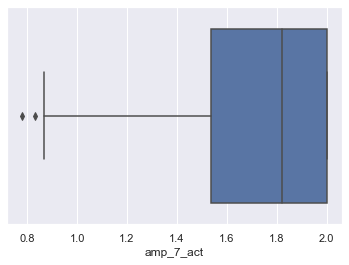

In [35]:
import seaborn as sns

sns.boxplot(df1['amp_7_act'])

/usr/local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='phi_7_act'>

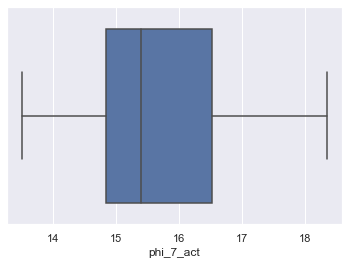

In [37]:
sns.boxplot(df1['phi_7_act'])

/usr/local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='IS_7_act'>

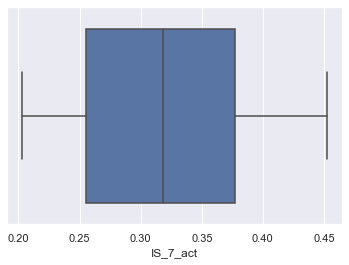

In [38]:
sns.boxplot(df1['IS_7_act'])

/usr/local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='IV_7_act'>

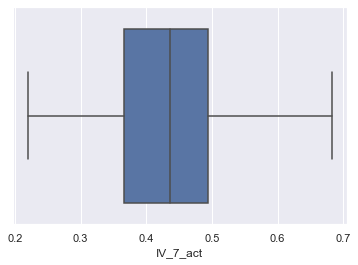

In [39]:
sns.boxplot(df1['IV_7_act'])

/usr/local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='RA_7_act'>

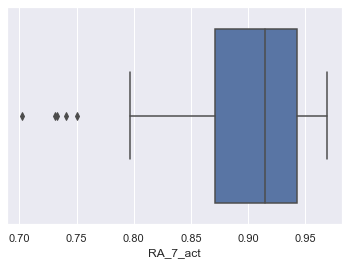

In [40]:
sns.boxplot(df1['RA_7_act'])

In [16]:
def outliers(df, feature):
    Q1= df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    upper_limit = Q3 + 1.5 * IQR
    lower_limit = Q1 - 1.5 * IQR
    return upper_limit, lower_limit

upper, lower = outliers(df1, "amp_7_act")
print("Upper whisker: ", upper)
print("Lower Whisker: ", lower)

Upper whisker:  2.6946008496463727
Lower Whisker:  0.8423319168512501


In [17]:
df1[(df1['amp_7_act'] < lower) | (df1['amp_7_act'] > upper)]

,age_group,handedness,gender,actiwatch_arm,fitbit_device,actmin_7_act,amp_7_act,alpha_7_act,beta_7_act,phi_7_act,...,M10_start_7_fit_norm,M10_7_fit_norm,IS_10_fit_norm,IV_10_fit_norm,RA_10_fit_norm,L5_start_10_fit_norm,L5_10_fit_norm,M10_start_10_fit_norm,M10_10_fit_norm,beiwe
subject,,,,,,,,,,,,,,,,,,,,,
10038,1,2.0,2.0,2.0,Fitbit Charge 2 HR,2.000000,0.830339,-0.678623,155.218768,16.047099,...,"[(17, 12, 0)]",0.078647,0.130452,0.352643,0.986880,"[(6, 7, 0)]",0.000525,"[(17, 32, 0)]",0.079544,0
10139,1,2.0,2.0,2.0,Fitbit Charge 2 HR,1.857932,0.781247,-0.639606,87.993683,17.384963,...,"[(23, 58, 0)]",0.039363,0.201328,0.231641,0.959998,"[(7, 41, 0)]",0.000858,"[(23, 19, 0)]",0.042039,0


In [18]:
clean_df = df1[(df1['amp_7_act'] > lower) & (df1['amp_7_act'] < upper)]

upper, lower = outliers(clean_df, "RA_7_act")
clean_df = clean_df[(clean_df['RA_7_act'] > lower) & (clean_df['RA_7_act'] < upper)]


## Number of subjects & some basic descriptive statistics <a class="anchor" id="descriptive-statistics"></a>

In [19]:
df1.groupby('age_group').describe()[['gender', 'handedness']]

gender                                              handedness  \
           count      mean       std  min  25%  50%  75%  max      count   
age_group                                                                  
1           29.0  1.724138  0.454859  1.0  1.0  2.0  2.0  2.0       29.0   
2           29.0  1.586207  0.501230  1.0  1.0  2.0  2.0  2.0       29.0   

                                                        
               mean       std  min  25%  50%  75%  max  
age_group                                               
1          1.896552  0.309934  1.0  2.0  2.0  2.0  2.0  
2          1.965517  0.325440  1.0  2.0  2.0  2.0  3.0

In [20]:
df1.groupby('fitbit_device').describe()

age_group                                               \
                       count      mean       std  min  25%  50%  75%  max   
fitbit_device                                                               
Fitbit Charge 2 HR      36.0  1.444444  0.503953  1.0  1.0  1.0  2.0  2.0   
Fitbit Inspire HR       22.0  1.590909  0.503236  1.0  1.0  2.0  2.0  2.0   

                   handedness            ... M10_10_fit_norm           beiwe  \
                        count      mean  ...             75%       max count   
fitbit_device                            ...                                   
Fitbit Charge 2 HR       36.0  1.916667  ...        0.104243  0.209766  36.0   
Fitbit Inspire HR        22.0  1.954545  ...        0.102298  0.143971  22.0   

                                                                 
                        mean       std  min  25%  50%  75%  max  
fitbit_device                                                    
Fitbit Charge 2 HR  0.166667  0.377964  0.0  0.0  0.0  0.0  1.0  
Fitbit Inspire HR   0.363636  0.492366  0.0  0.0  0.0  1.0  1.0  

[2 rows x 680 columns]

In [25]:
df1.groupby('beiwe').describe()

age_group                                               handedness  \
          count      mean       std  min   25%  50%  75%  max      count   
beiwe                                                                      
0          44.0  1.431818  0.501056  1.0  1.00  1.0  2.0  2.0       44.0   
1          14.0  1.714286  0.468807  1.0  1.25  2.0  2.0  2.0       14.0   

                 ... L5_10_fit_norm           M10_10_fit_norm            \
           mean  ...            75%       max           count      mean   
beiwe            ...                                                      
0      1.909091  ...       0.001431  0.003100            33.0  0.084849   
1      2.000000  ...       0.001134  0.010981            14.0  0.105924   

                                                                   
            std       min       25%       50%       75%       max  
beiwe                                                              
0      0.037258  0.032932  0.061231  0.082477  0.093873  0.209766  
1      0.040809  0.027876  0.077778  0.103287  0.137446  0.189117  

[2 rows x 672 columns]

## Correlations <a class="anchor" id="correlations"></a>

### Cosinor measure correlations

In [37]:
df1.isna().sum()[['actmin_7_act', 'IS_7_act']]
# df1[df1.columns[df1.columns.str.contains('7_fit|7_act')].to_list()].corr(method='spearman')#[df1.columns[df1.columns.str.contains('7_fit')].to_list()[0:5]][0:5]

actmin_7_act    8
IS_7_act        8
dtype: int64

In [50]:
dfcor = df1.select_dtypes('float')

In [68]:
dfcor[dfcor.columns[dfcor.columns.str.contains('7_fit_norm|7_act')].to_list()].corr(method='spearman')[dfcor.columns[dfcor.columns.str.contains('7_fit')].to_list()[0:5]][0:5]


KeyError: "None of [Index(['actmin_7_fit', 'amp_7_fit', 'alpha_7_fit', 'beta_7_fit', 'phi_7_fit'], dtype='object')] are in the [columns]"

In [70]:
df1.groupby('beiwe')[df1.columns[df1.columns.str.contains('7_fit|7_act')].to_list()].corr(method='spearman')[df1.columns[df1.columns.str.contains('7_fit')].to_list()[0:5]]


actmin_7_fit  amp_7_fit  alpha_7_fit  beta_7_fit  \
beiwe                                                                    
0.0   actmin_7_act        0.343145   0.227442    -0.083065    0.229032   
      amp_7_act          -0.351755  -0.103076    -0.016136   -0.296491   
      alpha_7_act        -0.062500  -0.003226    -0.096774    0.334677   
      beta_7_act         -0.156048   0.071378    -0.289113    0.389919   
      phi_7_act           0.101613  -0.085492     0.109677    0.031048   
...                            ...        ...          ...         ...   
1.0   IS_7_fit_norm      -0.120879   0.467033     0.467033   -0.324176   
      IV_7_fit_norm      -0.401099  -0.010989     0.065934   -0.109890   
      RA_7_fit_norm      -0.021978   0.181319     0.153846    0.219780   
      L5_7_fit_norm      -0.082418   0.010989    -0.115385   -0.318681   
      M10_7_fit_norm     -0.082418   0.439560     0.060440   -0.181319   

                      phi_7_fit  
beiwe                            
0.0   actmin_7_act     0.406048  
      amp_7_act       -0.148447  
      alpha_7_act     -0.131048  
      beta_7_act      -0.010484  
      phi_7_act        0.548790  
...                         ...  
1.0   IS_7_fit_norm   -0.692308  
      IV_7_fit_norm    0.390110  
      RA_7_fit_norm   -0.082418  
      L5_7_fit_norm   -0.131868  
      M10_7_fit_norm  -0.554945  

[80 rows x 5 columns]

In [53]:
print(dfcor[dfcor.columns[dfcor.columns.str.contains('7_fit|7_act')].to_list()].corr(method='spearman')[dfcor.columns[dfcor.columns.str.contains('7_fit')].to_list()[0:5]][0:5].to_latex(float_format="%.2f"))


\begin{tabular}{lrrrrr}
\toprule
{} &  actmin\_7\_fit &  amp\_7\_fit &  alpha\_7\_fit &  beta\_7\_fit &  phi\_7\_fit \\
\midrule
actmin\_7\_act &          0.32 &       0.17 &        -0.04 &        0.23 &       0.33 \\
amp\_7\_act    &         -0.32 &       0.00 &        -0.11 &       -0.25 &      -0.17 \\
alpha\_7\_act  &         -0.14 &       0.17 &         0.10 &        0.12 &      -0.29 \\
beta\_7\_act   &         -0.10 &       0.06 &        -0.22 &        0.34 &      -0.11 \\
phi\_7\_act    &          0.12 &      -0.16 &         0.02 &        0.01 &       0.61 \\
\bottomrule
\end{tabular}



In [54]:
dfcor[dfcor.columns[dfcor.columns.str.contains('7_act_norm|7_fit_norm')].to_list()].astype('float64').corr(method = 'spearman')[dfcor.columns[dfcor.columns.str.contains('7_fit_norm')].to_list()[0:5]][0:5]


,actmin_7_fit_norm,amp_7_fit_norm,alpha_7_fit_norm,beta_7_fit_norm,phi_7_fit_norm
actmin_7_act_norm,0.185155,0.179159,0.049186,0.038490,0.153553
amp_7_act_norm,0.251762,0.438619,0.448019,0.424844,-0.085163
alpha_7_act_norm,0.174945,0.557086,0.797261,0.758691,-0.440888
beta_7_act_norm,0.209951,0.601329,0.807471,0.786727,-0.364881
phi_7_act_norm,-0.128110,-0.362450,-0.529374,-0.489182,0.761446


In [44]:
print(dfcor[dfcor.columns[dfcor.columns.str.contains('7_act_norm|7_fit_norm')].to_list()].astype('float64').corr(method = 'spearman')[dfcor.columns[dfcor.columns.str.contains('7_fit_norm')].to_list()[0:5]][0:5].to_latex(float_format="%.2f"))

\begin{tabular}{lrrrrr}
\toprule
{} &  actmin\_7\_fit\_norm &  amp\_7\_fit\_norm &  alpha\_7\_fit\_norm &  beta\_7\_fit\_norm &  phi\_7\_fit\_norm \\
\midrule
actmin\_7\_act\_norm &               0.17 &            0.23 &              0.15 &             0.15 &            0.06 \\
amp\_7\_act\_norm    &               0.22 &            0.47 &              0.52 &             0.52 &           -0.18 \\
alpha\_7\_act\_norm  &               0.13 &            0.54 &              0.81 &             0.78 &           -0.50 \\
beta\_7\_act\_norm   &               0.15 &            0.57 &              0.81 &             0.80 &           -0.42 \\
phi\_7\_act\_norm    &              -0.14 &           -0.37 &             -0.55 &            -0.48 &            0.76 \\
\bottomrule
\end{tabular}



In [45]:
import pingouin as pg

print('Minimum')
print(dfcor.partial_corr(x='actmin_7_act', y='actmin_7_fit', method='spearman').round(4))
print('Amplitude')
print(dfcor.partial_corr(x='amp_7_act', y='amp_7_fit', method='spearman').round(4))
print('Alpha')
print(dfcor.partial_corr(x='alpha_7_act', y='alpha_7_fit', method='spearman').round(4))
print('Beta')
print(dfcor.partial_corr(x='beta_7_act', y='beta_7_fit', method='spearman').round(4))
print('Acrophase')
print(dfcor.partial_corr(x='phi_7_act', y='phi_7_fit', method='spearman').round(5))


Minimum
           n       r          CI95%   p-val
spearman  48  0.2787  [-0.01, 0.52]  0.0551
Amplitude
           n      r          CI95%   p-val
spearman  48 -0.011  [-0.29, 0.27]  0.9411
Alpha
           n       r         CI95%   p-val
spearman  48  0.1332  [-0.16, 0.4]  0.3668
Beta
           n       r          CI95%   p-val
spearman  48  0.2121  [-0.08, 0.47]  0.1478
Acrophase
           n        r        CI95%  p-val
spearman  48  0.67282  [0.48, 0.8]    0.0


In [46]:
import pingouin as pg

print('Minimum')
print(dfcor.partial_corr(x='actmin_7_act_norm', y='actmin_7_fit_norm', method='spearman').round(3))
print('Amplitude')
print(dfcor.partial_corr(x='amp_7_act_norm', y='amp_7_fit_norm', method='spearman').round(3))
print('Alpha')
print(dfcor.partial_corr(x='alpha_7_act_norm', y='alpha_7_fit_norm', method='spearman').round(3))
print('Beta')
print(dfcor.partial_corr(x='beta_7_act_norm', y='beta_7_fit_norm', method='spearman').round(3))
print('Acrophase')
print(dfcor.partial_corr(x='phi_7_act_norm', y='phi_7_fit_norm', method='spearman').round(3))

Minimum
           n      r          CI95%  p-val
spearman  47  0.174  [-0.12, 0.44]  0.241
Amplitude
           n      r         CI95%  p-val
spearman  47  0.473  [0.22, 0.67]  0.001
Alpha
           n      r         CI95%  p-val
spearman  47  0.812  [0.68, 0.89]    0.0
Beta
           n      r         CI95%  p-val
spearman  47  0.802  [0.67, 0.89]    0.0
Acrophase
           n      r         CI95%  p-val
spearman  47  0.764  [0.61, 0.86]    0.0


### Non-parametric measure correlations

In [55]:
df1[df1.columns[df1.columns.str.contains('IS_7|IV_7|RA_7')].to_list()].corr(method='spearman')[df1.columns[df1.columns.str.contains('IS_7_fit|IV_7_fit|RA_7_fit')].to_list()]
                                         

,IS_7_fit,IV_7_fit,RA_7_fit,IS_7_fit_norm,IV_7_fit_norm,RA_7_fit_norm
IS_7_act,0.647992,-0.022501,0.406826,0.647992,-0.022501,0.406826
IV_7_act,-0.500000,0.575657,-0.227726,-0.500000,0.575657,-0.227726
RA_7_act,0.482181,-0.146934,0.722440,0.482181,-0.146934,0.722440
IS_7_fit,1.000000,-0.268801,0.337813,1.000000,-0.268801,0.337813
IV_7_fit,-0.268801,1.000000,-0.219722,-0.268801,1.000000,-0.219722
RA_7_fit,0.337813,-0.219722,1.000000,0.337813,-0.219722,1.000000
IS_7_act_norm,0.647992,-0.022501,0.406826,0.647992,-0.022501,0.406826
IV_7_act_norm,-0.500000,0.575657,-0.227726,-0.500000,0.575657,-0.227726
RA_7_act_norm,0.482181,-0.146934,0.722440,0.482181,-0.146934,0.722440
IS_7_fit_norm,1.000000,-0.268801,0.337813,1.000000,-0.268801,0.337813


In [48]:
print(df1[df1.columns[df1.columns.str.contains('IS_7|IV_7|RA_7')].to_list()].corr(method='spearman')[df1.columns[df1.columns.str.contains('IS_7_fit|IV_7_fit|RA_7_fit')].to_list()]
     .to_latex(float_format="%.2f"))

\begin{tabular}{lrrrrrr}
\toprule
{} &  IS\_7\_fit &  IV\_7\_fit &  RA\_7\_fit &  IS\_7\_fit\_norm &  IV\_7\_fit\_norm &  RA\_7\_fit\_norm \\
\midrule
IS\_7\_act      &      0.69 &     -0.00 &      0.41 &           0.69 &          -0.00 &           0.41 \\
IV\_7\_act      &     -0.49 &      0.58 &     -0.20 &          -0.49 &           0.58 &          -0.20 \\
RA\_7\_act      &      0.46 &     -0.10 &      0.70 &           0.46 &          -0.10 &           0.70 \\
IS\_7\_fit      &      1.00 &     -0.22 &      0.32 &           1.00 &          -0.22 &           0.32 \\
IV\_7\_fit      &     -0.22 &      1.00 &     -0.11 &          -0.22 &           1.00 &          -0.11 \\
RA\_7\_fit      &      0.32 &     -0.11 &      1.00 &           0.32 &          -0.11 &           1.00 \\
IS\_7\_act\_norm &      0.69 &     -0.00 &      0.41 &           0.69 &          -0.00 &           0.41 \\
IV\_7\_act\_norm &     -0.49 &      0.58 &     -0.20 &          -0.49 &           0.58 &          -0.20 \\

In [40]:
import pingouin as pg

print('IS')
print(df1.partial_corr(x='IS_7_act', y='IS_7_fit', method='spearman').round(4))
print('IV')
print(df1.partial_corr(x='IV_7_act', y='IV_7_fit', method='spearman').round(4))
print('RA')
print(df1.partial_corr(x='RA_7_act', y='RA_7_fit', method='spearman').round(4))

IS
           n       r         CI95%  p-val
spearman  41  0.6679  [0.45, 0.81]    0.0
IV
           n       r        CI95%   p-val
spearman  41  0.5542  [0.3, 0.74]  0.0002
RA
           n       r         CI95%  p-val
spearman  41  0.6415  [0.42, 0.79]    0.0


In [49]:
import pingouin as pg

print('IS')
print(df1.partial_corr(x='IS_7_act_norm', y='IS_7_fit_norm', method='spearman').round(3))
print('IV')
print(df1.partial_corr(x='IV_7_act_norm', y='IV_7_fit_norm', method='spearman').round(3))
print('RA')
print(df1.partial_corr(x='RA_7_act_norm', y='RA_7_fit_norm', method='spearman').round(3))

IS
           n      r        CI95%  p-val
spearman  47  0.692  [0.5, 0.82]    0.0
IV
           n      r         CI95%  p-val
spearman  47  0.581  [0.35, 0.74]    0.0
RA
           n      r         CI95%  p-val
spearman  47  0.703  [0.52, 0.82]    0.0


In [30]:
df1.groupby('beiwe')[df1.columns[df1.columns.str.contains('IS_7|IV_7|RA_7')].to_list()].corr(method='spearman')[df1.columns[df1.columns.str.contains('IS_7_fit|IV_7_fit|RA_7_fit')].to_list()]
                                         

IS_7_fit  IV_7_fit  RA_7_fit  IS_7_fit_norm  \
beiwe                                                              
0     IS_7_act       0.628676  0.039104  0.323864       0.628676   
      IV_7_act      -0.575869  0.613971 -0.248997      -0.575869   
      RA_7_act       0.350267 -0.078209  0.788770       0.350267   
      IS_7_fit       1.000000 -0.309492  0.293115       1.000000   
      IV_7_fit      -0.309492  1.000000 -0.136364      -0.309492   
      RA_7_fit       0.293115 -0.136364  1.000000       0.293115   
      IS_7_act_norm  0.628676  0.039104  0.323864       0.628676   
      IV_7_act_norm -0.575869  0.613971 -0.248997      -0.575869   
      RA_7_act_norm  0.350267 -0.078209  0.788770       0.350267   
      IS_7_fit_norm  1.000000 -0.309492  0.293115       1.000000   
      IV_7_fit_norm -0.309492  1.000000 -0.136364      -0.309492   
      RA_7_fit_norm  0.293115 -0.136364  1.000000       0.293115   
1     IS_7_act       0.885714 -0.085714  0.476923       0.885714   
      IV_7_act      -0.296703  0.595604 -0.068132      -0.296703   
      RA_7_act       0.586813 -0.279121  0.397802       0.586813   
      IS_7_fit       1.000000 -0.059341  0.292308       1.000000   
      IV_7_fit      -0.059341  1.000000 -0.129670      -0.059341   
      RA_7_fit       0.292308 -0.129670  1.000000       0.292308   
      IS_7_act_norm  0.885714 -0.085714  0.476923       0.885714   
      IV_7_act_norm -0.296703  0.595604 -0.068132      -0.296703   
      RA_7_act_norm  0.586813 -0.279121  0.397802       0.586813   
      IS_7_fit_norm  1.000000 -0.059341  0.292308       1.000000   
      IV_7_fit_norm -0.059341  1.000000 -0.129670      -0.059341   
      RA_7_fit_norm  0.292308 -0.129670  1.000000       0.292308   

                     IV_7_fit_norm  RA_7_fit_norm  
beiwe                                              
0     IS_7_act            0.039104       0.323864  
      IV_7_act            0.613971      -0.248997  
      RA_7_act           -0.078209       0.788770  
      IS_7_fit           -0.309492       0.293115  
      IV_7_fit            1.000000      -0.136364  
      RA_7_fit           -0.136364       1.000000  
      IS_7_act_norm       0.039104       0.323864  
      IV_7_act_norm       0.613971      -0.248997  
      RA_7_act_norm      -0.078209       0.788770  
      IS_7_fit_norm      -0.309492       0.293115  
      IV_7_fit_norm       1.000000      -0.136364  
      RA_7_fit_norm      -0.136364       1.000000  
1     IS_7_act           -0.085714       0.476923  
      IV_7_act            0.595604      -0.068132  
      RA_7_act           -0.279121       0.397802  
      IS_7_fit           -0.059341       0.292308  
      IV_7_fit            1.000000      -0.129670  
      RA_7_fit           -0.129670       1.000000  
      IS_7_act_norm      -0.085714       0.476923  
      IV_7_act_norm       0.595604      -0.068132  
      RA_7_act_norm      -0.279121       0.397802  
      IS_7_fit_norm      -0.059341       0.292308  
      IV_7_fit_norm       1.000000      -0.129670  
      RA_7_fit_norm      -0.129670       1.000000

## Partial correlations covarying for resting heart rate and bmi <a class="anchor" id="partial-correlations"></a>

dailyActivity RestingHeartRate
weightLogInfo BMI

In [50]:
weight = []
weight_files = sorted(glob.glob(data_dir + 'fitbit/*weightLogInfo*.csv'))
beiwe_weight_files = sorted(glob.glob(data_dir + 'Megan Fitbit data/*/fitbit_daily_records.csv'))
# for file in weight_files:
#     weight = pd.read_csv(file)
#     print(os.path.basename(file))
#     print(weight['BMI'])

for file in beiwe_weight_files:
    weightdf = pd.read_csv(file)
    weight.append([os.path.basename(os.path.dirname(file)), weightdf['body_bmi'].mean()])


In [75]:
weightdf = pd.DataFrame(weight, columns = ['beiwe_id', 'bmi'])
weightdf['beiwe_id'] = weightdf['beiwe_id'].str.zfill(3)
df1['beiwe_id'] = df1.index.str[-3:]
df2 = pd.merge(df1.reset_index(), weightdf, on = 'beiwe_id', how = 'outer')
df2 = df2.set_index('subject')

In [53]:
rhr = []
rhr_files = sorted(glob.glob(data_dir + 'fitbit/*dailyActivity*.csv'))
for file in rhr_files:
    dailyActivity = pd.read_csv(file)
    rhr.append([os.path.basename(file).split("WA_")[1].split('_daily')[0], dailyActivity['RestingHeartRate'].mean()])

In [76]:
rhrdf = pd.DataFrame(rhr, columns = ['subject', 'rhr']).set_index('subject')
rhrdf.index = rhrdf.index.map(str)
df2 = df2.join(rhrdf, how = 'outer')
df2


,age_group,handedness,gender,actiwatch_arm,fitbit_device,actmin_7_act,amp_7_act,alpha_7_act,beta_7_act,phi_7_act,...,IV_10_fit_norm,RA_10_fit_norm,L5_start_10_fit_norm,L5_10_fit_norm,M10_start_10_fit_norm,M10_10_fit_norm,actiwatch_assignment,beiwe_id,bmi,rhr
subject,,,,,,,,,,,,,,,,,,,,,
10011,1.0,2.0,2.0,2.0,Fitbit Charge 2 HR,1.175643,1.639328,-0.731704,409.618573,14.860625,...,0.537293,0.995893,"[(5, 2, 0)]",0.000217,"[(16, 18, 0)]",0.105243,dominant,011,28.341774,53.400000
10012,1.0,1.0,2.0,1.0,Fitbit Charge 2 HR,1.236987,1.640366,-0.680088,18.988752,16.694780,...,0.224610,0.989213,"[(6, 56, 0)]",0.000522,"[(20, 33, 0)]",0.096201,dominant,012,NaN,69.285714
10014,1.0,2.0,2.0,2.0,Fitbit Charge 2 HR,1.256265,1.578544,-0.693218,14.231289,16.530233,...,0.316041,0.995594,"[(7, 19, 0)]",0.000233,"[(18, 15, 0)]",0.105333,dominant,014,NaN,76.375000
10016,1.0,2.0,2.0,1.0,Fitbit Charge 2 HR,1.625128,1.312806,-0.702707,46.358950,15.080765,...,0.209467,0.980336,"[(6, 1, 0)]",0.000904,"[(18, 44, 0)]",0.091073,non-dominant,016,NaN,58.444444
10023,1.0,2.0,1.0,1.0,Fitbit Charge 2 HR,0.874169,2.000000,-0.947025,13.167707,18.223667,...,0.233504,0.808852,"[(7, 35, 0)]",0.010981,"[(20, 49, 0)]",0.103910,non-dominant,023,27.148205,68.071429
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20182,2.0,2.0,2.0,2.0,Fitbit Inspire HR,1.046134,1.713977,-0.521339,21.296197,15.295543,...,0.278955,0.996211,"[(4, 47, 0)]",0.000195,"[(17, 37, 0)]",0.102665,dominant,182,26.458279,NaN
20184,2.0,2.0,2.0,1.0,Fitbit Inspire HR,1.029864,1.918058,-0.638919,351.044450,14.387323,...,0.374636,0.993870,"[(5, 45, 0)]",0.000223,"[(17, 47, 0)]",0.072466,non-dominant,184,24.961470,NaN
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11-8fahydu5,28.341774,NaN


[How to calculate partial correlation in python](https://www.statology.org/partial-correlation-python/)

In [77]:
import pingouin as pg

print('Minimum')
print(df2.partial_corr(x='actmin_7_act', y='actmin_7_fit', covar=['rhr'], method='spearman').round(3))
print('Amplitude')
print(df2.partial_corr(x='amp_7_act', y='amp_7_fit', covar=['rhr'], method='spearman').round(3))
print('Alpha')
print(df2.partial_corr(x='alpha_7_act', y='alpha_7_fit', covar=['rhr'], method='spearman').round(3))
print('Beta')
print(df2.partial_corr(x='beta_7_act', y='beta_7_fit', covar=['rhr'], method='spearman').round(3))
print('Acrophase')
print(df2.partial_corr(x='phi_7_act', y='phi_7_fit', covar=['rhr'], method='spearman').round(3))


Minimum
           n      r          CI95%  p-val
spearman  38  0.194  [-0.14, 0.49]  0.249
Amplitude
           n     r          CI95%  p-val
spearman  38 -0.07  [-0.39, 0.26]  0.681
Alpha
           n      r          CI95%  p-val
spearman  38  0.153  [-0.18, 0.45]  0.367
Beta
           n      r         CI95%  p-val
spearman  38  0.475  [0.18, 0.69]  0.003
Acrophase
           n      r         CI95%  p-val
spearman  38  0.692  [0.47, 0.83]    0.0


In [78]:
print('Minimum')
print(df2.partial_corr(x='actmin_7_act_norm', y='actmin_7_fit_norm', covar=['rhr'], method='spearman').round(5))
print('Amplitude')
print(df2.partial_corr(x='amp_7_act_norm', y='amp_7_fit_norm', covar=['rhr'], method='spearman').round(5))
print('Alpha')
print(df2.partial_corr(x='alpha_7_act_norm', y='alpha_7_fit_norm', covar=['rhr'], method='spearman').round(5))
print('Beta')
print(df2.partial_corr(x='beta_7_act_norm', y='beta_7_fit_norm', covar=['rhr'], method='spearman').round(5))
print('Acrophase')
print(df2.partial_corr(x='phi_7_act_norm', y='phi_7_fit_norm', covar=['rhr'], method='spearman').round(5))



Minimum
           n      r          CI95%    p-val
spearman  38  0.252  [-0.08, 0.53]  0.13242
Amplitude
           n        r         CI95%    p-val
spearman  38  0.45968  [0.16, 0.68]  0.00421
Alpha
           n        r         CI95%    p-val
spearman  38  0.42116  [0.11, 0.66]  0.00943
Beta
           n        r          CI95%   p-val
spearman  38  0.09968  [-0.23, 0.41]  0.5572
Acrophase
           n        r         CI95%  p-val
spearman  38  0.72776  [0.53, 0.85]    0.0


In [79]:
import pingouin as pg

print('Minimum')
print(df2.partial_corr(x='actmin_7_act', y='actmin_7_fit', covar=['bmi'], method='spearman').round(3))
print('Amplitude')
print(df2.partial_corr(x='amp_7_act', y='amp_7_fit', covar=['bmi'], method='spearman').round(3))
print('Alpha')
print(df2.partial_corr(x='alpha_7_act', y='alpha_7_fit', covar=['bmi'], method='spearman').round(3))
print('Beta')
print(df2.partial_corr(x='beta_7_act', y='beta_7_fit', covar=['bmi'], method='spearman').round(3))
print('Acrophase')
print(df2.partial_corr(x='phi_7_act', y='phi_7_fit', covar=['bmi'], method='spearman').round(3))


Minimum
           n      r          CI95%  p-val
spearman  14  0.103  [-0.47, 0.62]  0.737
Amplitude
           n      r         CI95%  p-val
spearman  14 -0.064  [-0.59, 0.5]  0.836
Alpha
           n      r        CI95%  p-val
spearman  14  0.705  [0.25, 0.9]  0.007
Beta
           n      r          CI95%  p-val
spearman  14  0.002  [-0.55, 0.55]  0.994
Acrophase
           n      r         CI95%  p-val
spearman  14  0.723  [0.29, 0.91]  0.005


In [80]:
print('Minimum')
print(df2.partial_corr(x='actmin_7_act_norm', y='actmin_7_fit_norm', covar=['bmi'], method='spearman').round(3))
print('Amplitude')
print(df2.partial_corr(x='amp_7_act_norm', y='amp_7_fit_norm', covar=['bmi'], method='spearman').round(3))
print('Alpha')
print(df2.partial_corr(x='alpha_7_act_norm', y='alpha_7_fit_norm', covar=['bmi'], method='spearman').round(3))
print('Beta')
print(df2.partial_corr(x='beta_7_act_norm', y='beta_7_fit_norm', covar=['bmi'], method='spearman').round(3))
print('Acrophase')
print(df2.partial_corr(x='phi_7_act_norm', y='phi_7_fit_norm', covar=['bmi'], method='spearman').round(4))



Minimum
           n      r          CI95%  p-val
spearman  14  0.103  [-0.47, 0.62]  0.737
Amplitude
           n      r          CI95%  p-val
spearman  14  0.103  [-0.47, 0.62]  0.737
Alpha
           n      r          CI95%  p-val
spearman  14  0.323  [-0.28, 0.74]  0.282
Beta
           n      r          CI95%  p-val
spearman  14  0.231  [-0.37, 0.69]  0.448
Acrophase
           n       r         CI95%   p-val
spearman  14  0.4462  [-0.14, 0.8]  0.1265


## Bland-Altman Plots <a class="anchor" id="bland-altman-plots"></a>

[Towards Data Science Tutorial](https://towardsdatascience.com/why-how-to-use-the-bland-altman-plot-for-a-b-testing-python-code-78712d28c362)

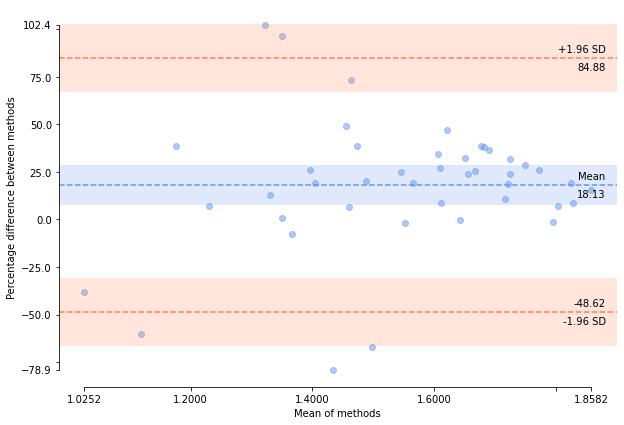

In [57]:
import pyCompare
df2 = df1[df1.columns[df1.columns.str.contains('7_')].to_list()].dropna(axis=0)

pyCompare.blandAltman(df2['amp_7_act'].values, df2['amp_7_fit'].values,
            limitOfAgreement=1.96,
            confidenceInterval=95,
            confidenceIntervalMethod='approximate',
            detrend=None,
            percentage=True)

Fitbit tends to underestimate rhythm amplitude by about 0.32  on average.

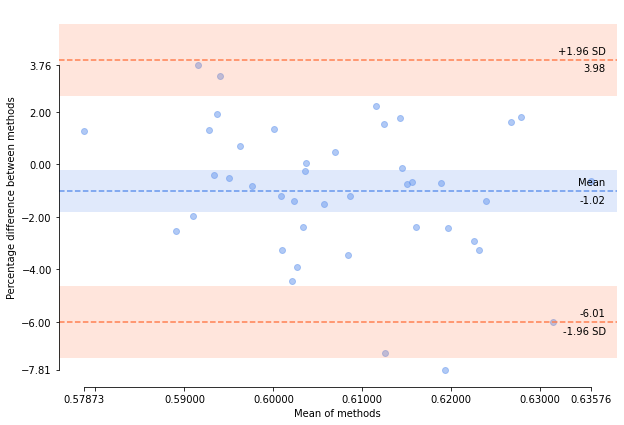

In [58]:
pyCompare.blandAltman(df2[df2['amp_7_act_norm'] > 0.5]['amp_7_act_norm'].values, df2[df2['amp_7_act_norm'] > 0.5]['amp_7_fit_norm'].values,
            limitOfAgreement=1.96,
            confidenceInterval=95,
            confidenceIntervalMethod='approximate',
            detrend=None,
            percentage=True)

But, when the activity values are normalized, Fitbit shows good agreement with the Actiwatch in assessing rhythm amplitude.

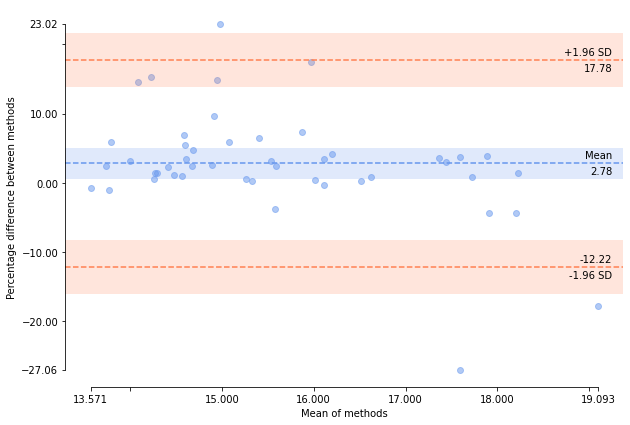

In [23]:
pyCompare.blandAltman(df2['phi_7_act'].values, df2['phi_7_fit'].values,
            limitOfAgreement=1.96,
            confidenceInterval=95,
            confidenceIntervalMethod='approximate',
            detrend=None,
            percentage=True)

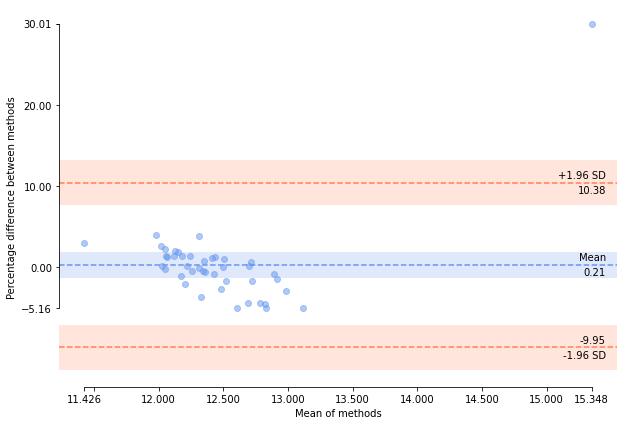

In [59]:
pyCompare.blandAltman(df2['phi_7_act_norm'].values, df2['phi_7_fit_norm'].values,
            limitOfAgreement=1.96,
            confidenceInterval=95,
            confidenceIntervalMethod='approximate',
            detrend=None,
            percentage=True)

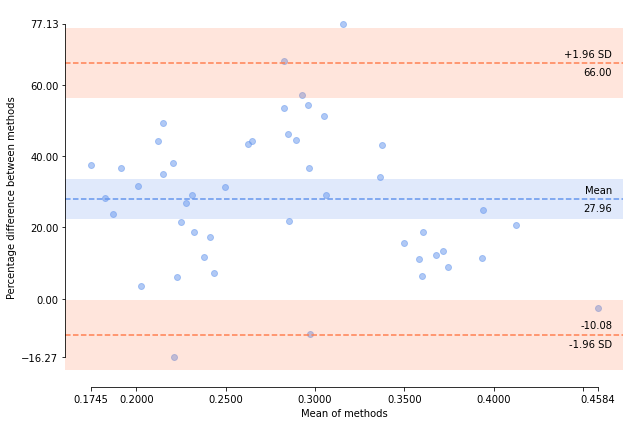

In [26]:
import pyCompare
df2 = df1[df1.columns[df1.columns.str.contains('7_')].to_list()].dropna(axis=0)

pyCompare.blandAltman(df2['IS_7_act'].values, df2['IS_7_fit'].values,
            limitOfAgreement=1.96,
            confidenceInterval=95,
            confidenceIntervalMethod='approximate',
            detrend=None,
            percentage=True)

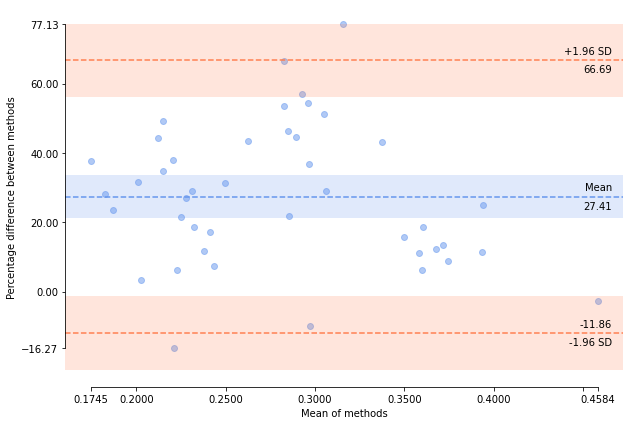

In [63]:
pyCompare.blandAltman(df2['IS_7_act_norm'].values, df2['IS_7_fit_norm'].values,
            limitOfAgreement=1.96,
            confidenceInterval=95,
            confidenceIntervalMethod='approximate',
            detrend=None,
            percentage=True)

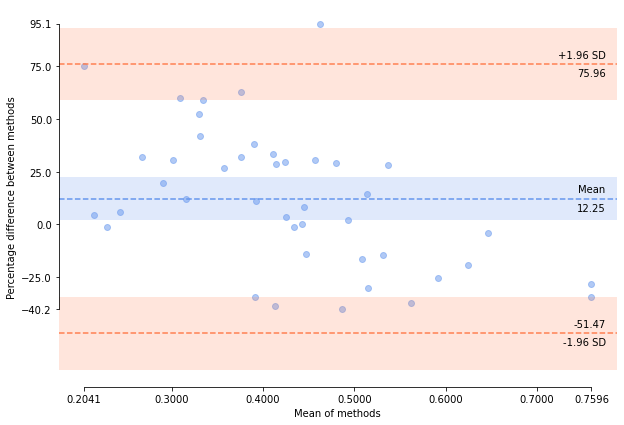

In [62]:
import pyCompare
df2 = df1[df1.columns[df1.columns.str.contains('7_')].to_list()].dropna(axis=0)

pyCompare.blandAltman(df2['IV_7_act_norm'].values, df2['IV_7_fit_norm'].values,
            limitOfAgreement=1.96,
            confidenceInterval=95,
            confidenceIntervalMethod='approximate',
            detrend=None,
            percentage=True)

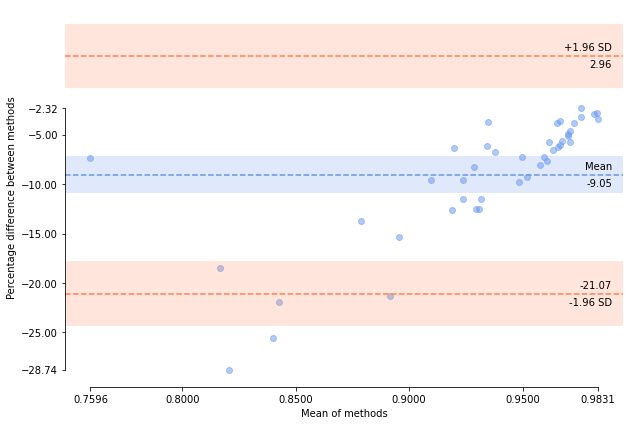

In [61]:
import pyCompare
df2 = df1[df1.columns[df1.columns.str.contains('7_')].to_list()].dropna(axis=0)

pyCompare.blandAltman(df2['RA_7_act_norm'].values, df2['RA_7_fit_norm'].values,
            limitOfAgreement=1.96,
            confidenceInterval=95,
            confidenceIntervalMethod='approximate',
            detrend=None,
            percentage=True)

## Scatterplots <a class="anchor" id="scatterplots"></a>

<AxesSubplot:xlabel='amp_10_act', ylabel='amp_10_fit'>

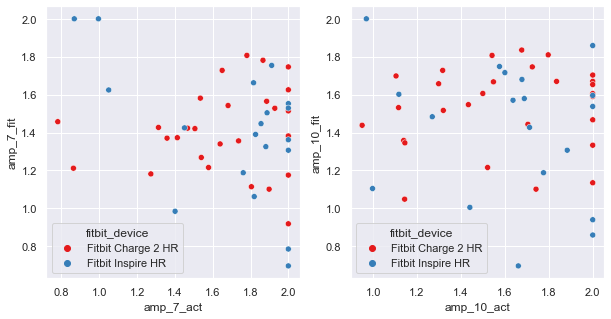

In [18]:
fig, ax = plt.subplots(1, 2, figsize = (10, 5))
sns.scatterplot(ax = ax[0], x = 'amp_7_act', y = 'amp_7_fit', hue = 'fitbit_device', ci=95, data = df1, palette = 'Set1')
sns.scatterplot(ax = ax[1], x = 'amp_10_act', y = 'amp_10_fit', hue = 'fitbit_device', ci=95, data = df1, palette = 'Set1')


<AxesSubplot:xlabel='actmin_10_act', ylabel='actmin_10_fit'>

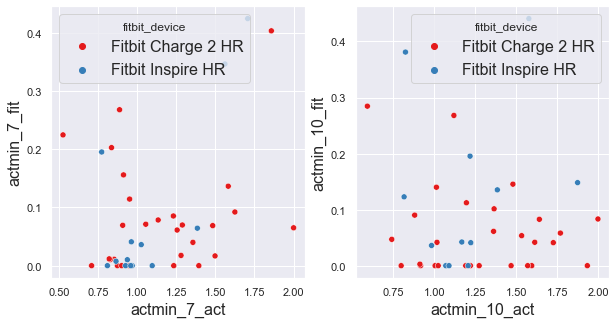

In [30]:
fig, ax = plt.subplots(1, 2, figsize = (10, 5))
sns.scatterplot(ax = ax[0], x = 'actmin_7_act', y = 'actmin_7_fit', hue = 'fitbit_device', ci=95, data = df1, palette = 'Set1')
sns.scatterplot(ax = ax[1], x = 'actmin_10_act', y = 'actmin_10_fit', hue = 'fitbit_device', ci=95, data = df1, palette = 'Set1')


<AxesSubplot:xlabel='beta_10_act', ylabel='beta_10_fit'>

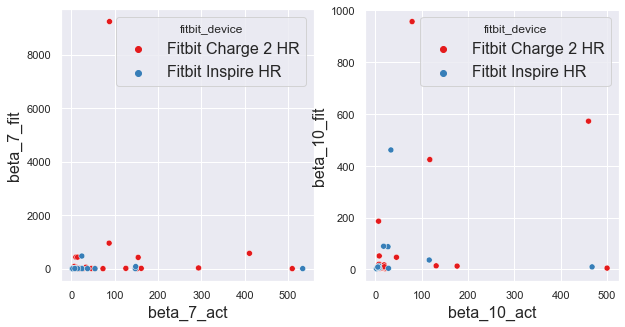

In [31]:
fig, ax = plt.subplots(1, 2, figsize = (10, 5))
sns.scatterplot(ax = ax[0], x = 'beta_7_act', y = 'beta_7_fit', hue = 'fitbit_device', ci=95, data = df1, palette = 'Set1')
sns.scatterplot(ax = ax[1], x = 'beta_10_act', y = 'beta_10_fit', hue = 'fitbit_device', ci=95, data = df1, palette = 'Set1')


<AxesSubplot:xlabel='alpha_10_act', ylabel='alpha_10_fit'>

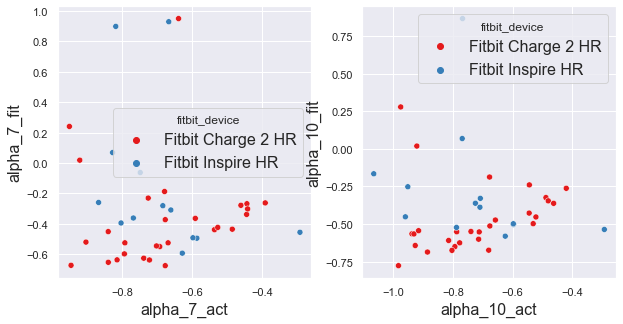

In [32]:
fig, ax = plt.subplots(1, 2, figsize = (10, 5))
sns.scatterplot(ax = ax[0], x = 'alpha_7_act', y = 'alpha_7_fit', hue = 'fitbit_device', ci=95, data = df1, palette = 'Set1')
sns.scatterplot(ax = ax[1], x = 'alpha_10_act', y = 'alpha_10_fit', hue = 'fitbit_device', ci=95, data = df1, palette = 'Set1')


<AxesSubplot:xlabel='phi_10_act', ylabel='phi_10_fit'>

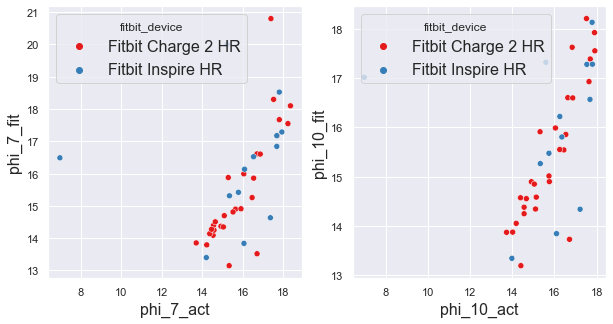

In [33]:
fig, ax = plt.subplots(1, 2, figsize = (10, 5))
sns.scatterplot(ax = ax[0], x = 'phi_7_act', y = 'phi_7_fit', hue = 'fitbit_device', ci=95, data = df1, palette = 'Set1')
sns.scatterplot(ax = ax[1], x = 'phi_10_act', y = 'phi_10_fit', hue = 'fitbit_device', ci=95, data = df1, palette = 'Set1')


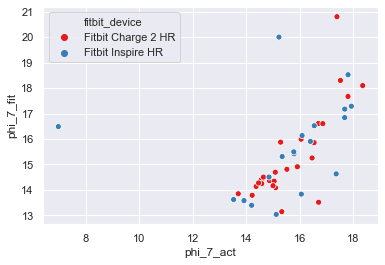

In [35]:
sns.scatterplot(x = 'phi_7_act', y = 'phi_7_fit', hue = 'fitbit_device', ci=95, data = df1, palette = 'Set1')


## Sleep Summary Stats <a class="anchor" id="sleep-summary-stats"></a>

In [9]:
sleep = pd.read_csv(data_dir + 'dataset_2021_07_19.csv')
# sleep = sleep[~sleep.index.isin(exclude)]
sleep = sleep.dropna(axis=1, how='all')

In [10]:
sleep[0:5]

,subject,redcap_id,age_group,handedness,actiwatch_arm,fitbit_device,dominant,join_date,start_date_act,interval_number_act,...,onset_latency_fit,time_in_bed_fit,awake_duration_fit,wake_time_fit,sleep_duration_act_manual,sleep_duration_fit_manual,tdif,joinid,lag_time,arm
0,10011,11,Young Adults,Right,Right,Fitbit Charge 2 HR,Dominant,2019-10-25,10/24/2019,1.0,...,0.0,556.0,4.0,2019-10-25 05:19:00,552.0,508.0,4.0,10011 2019-10-25,NaN,1
1,10011,11,Young Adults,Right,Right,Fitbit Charge 2 HR,Dominant,2019-10-26,10/25/2019,2.0,...,NaN,NaN,NaN,NaN,482.0,NaN,NaN,10011 2019-10-26,1.0,1
2,10011,11,Young Adults,Right,Right,Fitbit Charge 2 HR,Dominant,2019-10-27,10/26/2019,3.0,...,NaN,NaN,NaN,NaN,538.5,NaN,NaN,10011 2019-10-27,1.0,1
3,10011,11,Young Adults,Right,Right,Fitbit Charge 2 HR,Dominant,2019-10-28,10/28/2019,4.0,...,NaN,NaN,NaN,NaN,340.0,NaN,NaN,10011 2019-10-28,1.0,1
4,10011,11,Young Adults,Right,Right,Fitbit Charge 2 HR,Dominant,2019-10-29,10/28/2019,5.0,...,NaN,NaN,NaN,NaN,393.0,NaN,NaN,10011 2019-10-29,1.0,1


<AxesSubplot:>

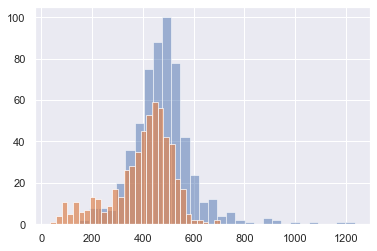

In [16]:
import scipy
sleep['sleep_duration_act'].hist(bins=30, label = "Actiwatch 2.0", alpha = 0.5)
sleep['sleep_duration_fit'].hist(bins=30, label = "Fitbit", alpha = 0.7)
# scipy.stats.shapiro(sleep['sleep_duration_fit'])

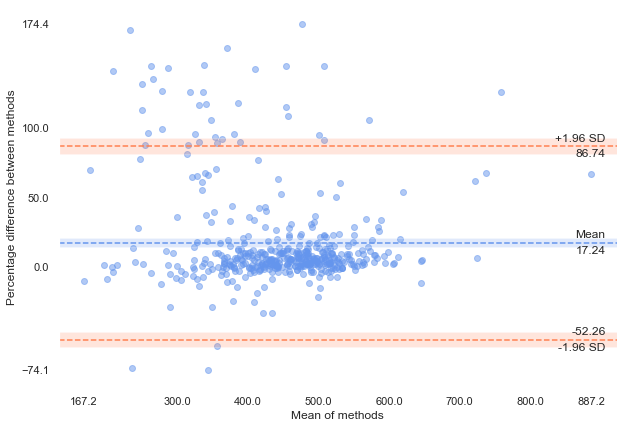

In [17]:
import pyCompare

sleep1 = sleep.dropna(axis = 0)

pyCompare.blandAltman(sleep1['sleep_duration_act'].values, sleep1['sleep_duration_fit'].values,
            limitOfAgreement=1.96,
            confidenceInterval=95,
            confidenceIntervalMethod='approximate',
            detrend=None,
            percentage=True)

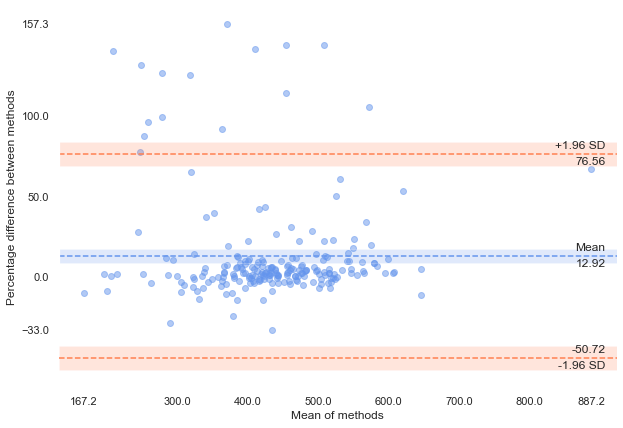

In [47]:
YA = sleep1[sleep1['age_group'] == 'Young Adults']
OA = sleep1[sleep1['age_group'] == 'Older Adults']

pyCompare.blandAltman(YA['sleep_duration_act'].values, YA['sleep_duration_fit'].values,
            limitOfAgreement=1.96,
            confidenceInterval=95,
            confidenceIntervalMethod='approximate',
            detrend=None,
            percentage=True)

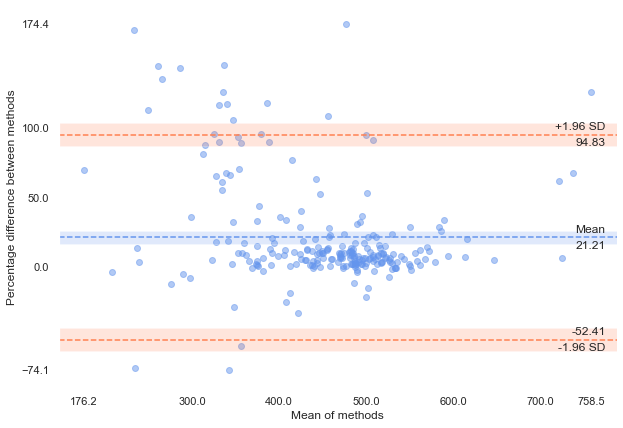

In [48]:
YA = sleep1[sleep1['age_group'] == 'Young Adults']
OA = sleep1[sleep1['age_group'] == 'Older Adults']

pyCompare.blandAltman(OA['sleep_duration_act'].values, OA['sleep_duration_fit'].values,
            limitOfAgreement=1.96,
            confidenceInterval=95,
            confidenceIntervalMethod='approximate',
            detrend=None,
            percentage=True)

Sleep duration assessed by the Actiwatch and Fitbit are significantly different. Because 70.63 > 0, Fitbit tends to underestimate sleep duration by about 70 minutes on average.

In [18]:
import pingouin as pg
pg.rm_corr(data=sleep, x='sleep_duration_act', y='sleep_duration_fit', subject='subject')


/usr/local/lib/python3.9/site-packages/outdated/utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.3.12, the latest is 0.4.0.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(
/usr/local/lib/python3.9/site-packages/pingouin/correlation.py:1156: RankWarning: Polyfit may be poorly conditioned
  aov = ancova(dv=y, covar=x, between=subject, data=data)


,r,dof,pval,CI95%,power
rm_corr,0.382482,435,1.132181e-16,"[0.3, 0.46]",1.0


<AxesSubplot:>

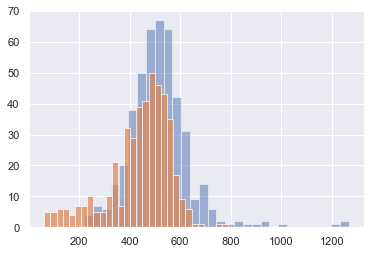

In [19]:
import scipy

sleep1['time_in_bed_act'].hist(bins=30, alpha = 0.5)
sleep1['time_in_bed_fit'].hist(bins=30, alpha = 0.7)
# scipy.stats.shapiro(sleep1['time_in_bed_fit'])

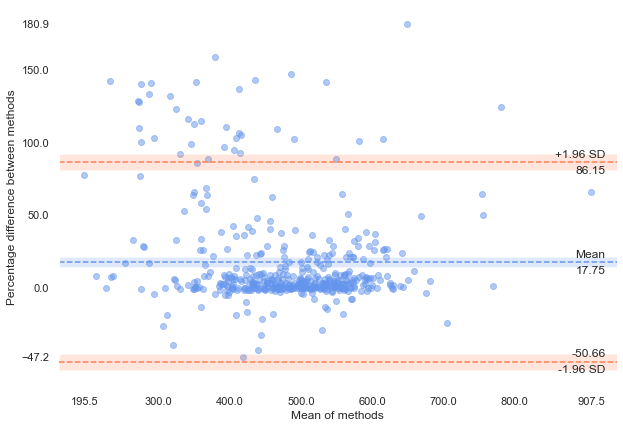

In [20]:
pyCompare.blandAltman(sleep1['time_in_bed_act'].values, sleep1['time_in_bed_fit'].values,
            limitOfAgreement=1.96,
            confidenceInterval=95,
            confidenceIntervalMethod='approximate',
            detrend=None,
            percentage=True)

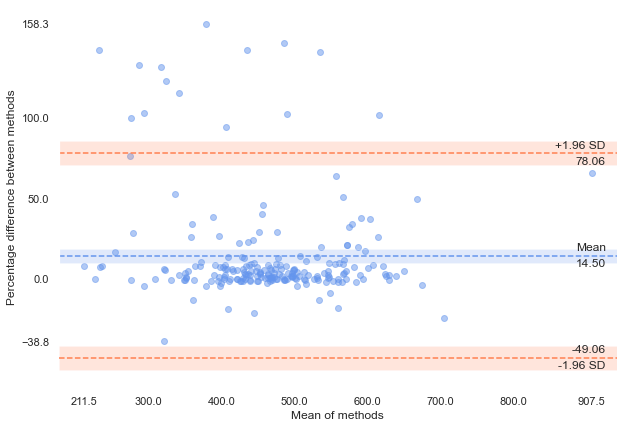

In [45]:
YA = sleep1[sleep1['age_group'] == 'Young Adults']
OA = sleep1[sleep1['age_group'] == 'Older Adults']

pyCompare.blandAltman(YA['time_in_bed_act'].values, YA['time_in_bed_fit'].values,
            limitOfAgreement=1.96,
            confidenceInterval=95,
            confidenceIntervalMethod='approximate',
            detrend=None,
            percentage=True)

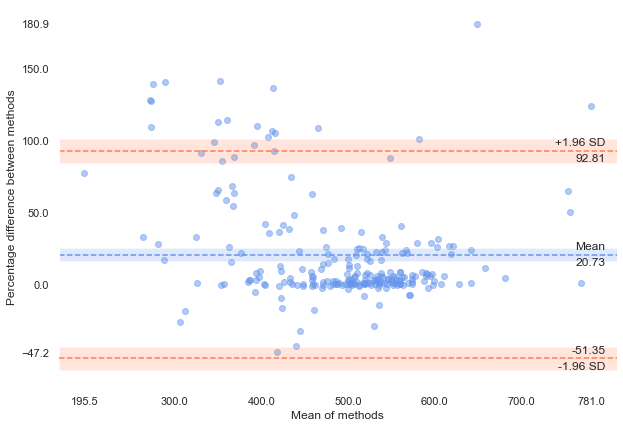

In [46]:
YA = sleep1[sleep1['age_group'] == 'Young Adults']
OA = sleep1[sleep1['age_group'] == 'Older Adults']

pyCompare.blandAltman(OA['time_in_bed_act'].values, OA['time_in_bed_fit'].values,
            limitOfAgreement=1.96,
            confidenceInterval=95,
            confidenceIntervalMethod='approximate',
            detrend=None,
            percentage=True)

Time in bed assessed by the Actiwatch and Fitbit are also significantly different. Because 77.43 > 0, Fitbit tends to underestimate time in bed by about 77 minutes on average.

In [21]:
pg.rm_corr(data=sleep, x='time_in_bed_act', y='time_in_bed_fit', subject='subject')


/usr/local/lib/python3.9/site-packages/pingouin/correlation.py:1156: RankWarning: Polyfit may be poorly conditioned
  aov = ancova(dv=y, covar=x, between=subject, data=data)


,r,dof,pval,CI95%,power
rm_corr,0.335674,435,5.712108e-13,"[0.25, 0.42]",1.0


In [37]:
corrdf = sleep.groupby('subject')[['time_in_bed_act', 'time_in_bed_fit']].corr(method = 'spearman')
corrdf = pd.DataFrame(corrdf[corrdf['time_in_bed_act'] != 1]['time_in_bed_act']).reset_index().drop('level_1', axis=1)
corrdf['group'] = np.where(corrdf['subject'] < 20000, "Young Adults", "Older Adults")
corrdf

,subject,time_in_bed_act,group
0,10012,0.857143,Young Adults
1,10014,0.714286,Young Adults
2,10016,0.452381,Young Adults
3,10023,0.268793,Young Adults
4,10024,0.903297,Young Adults
5,10025,0.964835,Young Adults
6,10033,-0.081319,Young Adults
7,10035,0.964835,Young Adults
8,10038,0.753783,Young Adults
9,10040,0.521978,Young Adults


In [41]:
from scipy.stats import ttest_ind

YA = corrdf[corrdf['group'] == "Young Adults"]
OA = corrdf[corrdf['group'] == "Older Adults"]

ttest_ind(YA['time_in_bed_act'].values, OA['time_in_bed_act'].values, nan_policy = "omit")

# YA['time_in_bed_act'].values

Ttest_indResult(statistic=1.16362125990982, pvalue=0.25099388011671037)

In [42]:
corrdf = sleep.groupby('subject')[['sleep_duration_act', 'sleep_duration_fit']].corr(method = 'spearman')
corrdf = pd.DataFrame(corrdf[corrdf['sleep_duration_act'] != 1]['sleep_duration_act']).reset_index().drop('level_1', axis=1)
corrdf['group'] = np.where(corrdf['subject'] < 20000, "Young Adults", "Older Adults")
corrdf

,subject,sleep_duration_act,group
0,10012,0.857143,Young Adults
1,10014,0.828571,Young Adults
2,10016,0.523810,Young Adults
3,10023,0.236364,Young Adults
4,10024,0.764317,Young Adults
5,10025,0.890110,Young Adults
6,10033,0.264318,Young Adults
7,10035,0.942857,Young Adults
8,10038,0.829670,Young Adults
9,10040,0.538462,Young Adults


In [43]:
from scipy.stats import ttest_ind

YA = corrdf[corrdf['group'] == "Young Adults"]
OA = corrdf[corrdf['group'] == "Older Adults"]

ttest_ind(YA['sleep_duration_act'].values, OA['sleep_duration_act'].values, nan_policy = "omit")

# YA['time_in_bed_act'].values

Ttest_indResult(statistic=1.4826487990026727, pvalue=0.14513771534438255)

# Interpreting Bland-Altman plots

[Towards Data Science post](https://towardsdatascience.com/why-how-to-use-the-bland-altman-plot-for-a-b-testing-python-code-78712d28c362)

# Interpreting Bland-Altman plots

[Towards Data Science post](https://towardsdatascience.com/why-how-to-use-the-bland-altman-plot-for-a-b-testing-python-code-78712d28c362)

<AxesSubplot:xlabel='sleep_duration_act', ylabel='sleep_duration_fit'>

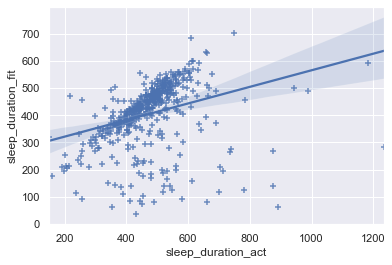

In [28]:
sns.regplot(data = sleep, x='sleep_duration_act', y='sleep_duration_fit', marker="+")

<AxesSubplot:xlabel='time_in_bed_act', ylabel='time_in_bed_fit'>

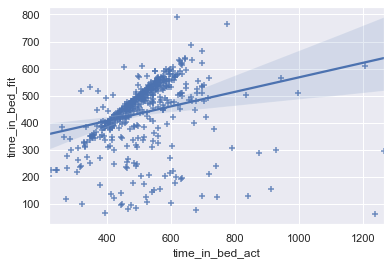

In [29]:
sns.regplot(data = sleep, x='time_in_bed_act', y='time_in_bed_fit', marker="+")

### Additional Interpolation

[pandas interpolate fx](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.interpolate.html)

[Towards Data Science](https://towardsdatascience.com/how-to-interpolate-time-series-data-in-apache-spark-and-python-pandas-part-1-pandas-cff54d76a2ea)

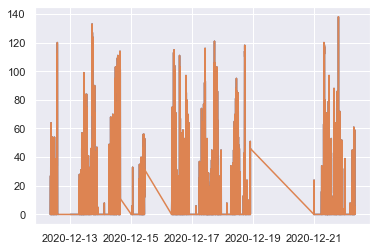

In [16]:
plt.plot(fit[record_id][str(ndays)].index, fit[record_id][str(ndays)])
plt.plot(fit[record_id][str(ndays)].index, fit[record_id][str(ndays)].interpolate(method='time'))

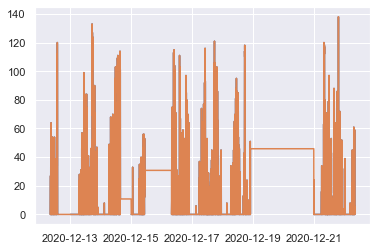

In [19]:
plt.plot(fit[record_id][str(ndays)].index, fit[record_id][str(ndays)])
plt.plot(fit[record_id][str(ndays)].index, fit[record_id][str(ndays)].interpolate(method='pad'))

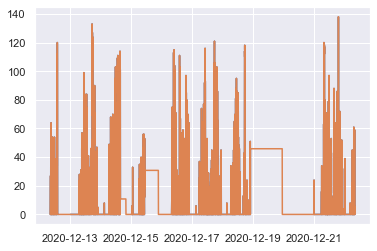

In [26]:
plt.plot(fit[record_id][str(ndays)].index, fit[record_id][str(ndays)])
plt.plot(fit[record_id][str(ndays)].index, fit[record_id][str(ndays)].interpolate(method='nearest'))

In [80]:
fit = np.load(data_dir + '/fitbit/fit_preproc.npy', allow_pickle=True)[()]
df = fit[record_id][str(ndays)]

In [81]:
import datetime as dt
clocktime = [int(dt.datetime.strptime(x, "%Y-%m-%d %H:%M:%S").time().strftime("%H")) + (int(dt.datetime.strptime(x, "%Y-%m-%d %H:%M:%S").time().strftime("%M"))/60) for x in df.index.astype(str)]
df = pd.concat([df.reset_index(), pd.DataFrame(clocktime)], axis=1, ignore_index=True)
df.columns = ['Time', 'Activity', 'Clocktime']
df = df.set_index(['Time'])
df

,Activity,Clocktime
Time,,
2020-12-12 08:19:00,0.0,8.316667
2020-12-12 08:20:00,0.0,8.333333
2020-12-12 08:21:00,0.0,8.350000
2020-12-12 08:22:00,18.0,8.366667
2020-12-12 08:23:00,0.0,8.383333
...,...,...
2020-12-22 08:15:00,31.0,8.250000
2020-12-22 08:16:00,8.0,8.266667
2020-12-22 08:17:00,0.0,8.283333


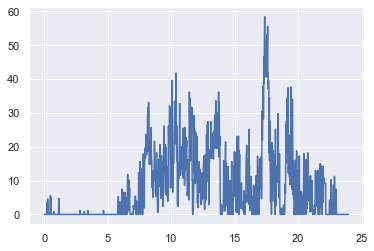

In [84]:
plt.plot(df.groupby('Clocktime').mean())

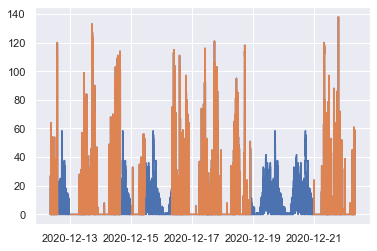

In [88]:
plt.plot(df.index, df.groupby('Clocktime').transform(lambda x: x.fillna(x.mean())))
plt.plot(df.index, df['Activity'])

<a id=’clockfill’></a>
### Clockfill

Now we want to do this for all subjects' fitbit data.

In [ ]:
from wearables import clockfill

fit = np.load(data_dir + '/fitbit/fit_preproc.npy', allow_pickle=True)[()]
fitFill = {}

for record_id in fit.keys():
    for ndays in fit[record_id].keys():
        try:
            fitFill[str(record_id)][str(ndays)] = clockfill.clockfill(fit[record_id][str(ndays)], record_id, data_dir + 'fitbit/preproc', clockplot=True, interpolateplot=True)
        except Exception as e:
            print(e)
    np.save(data_dir + '/fitbit/fit_clockfill.npy', fit)

## Visualize model fit

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from wearables import plotcosinor
import seaborn as sns
sns.set()

for record_id in act.keys():
    for ndays in act[record_id].keys():
        try:
            d1 = np.load(data_dir + 'fitbit/fit_preproc.npy', allow_pickle=True)[()][record_id][ndays]
            plotcosinor.plotcosinor(d1, 'antilogistic', 'Fitbit')
            plt.savefig(data_dir + 'circadian_measures/figures/' + record_id + '_' + ndays + 'd_fit_cr_plot.png', dpi = 300)
            plt.close('all')
        except Exception as e:
            print(e)
            
        try:
            d = np.load(data_dir + 'actiwatch/act_preproc.npy', allow_pickle=True)[()][record_id][ndays]
            plotcosinor.plotcosinor(d, 'antilogistic', 'Actiwatch 2.0')
            plt.savefig(data_dir + 'circadian_measures/figures/' + record_id + '_' + ndays + 'd_act_cr_plot.png', dpi = 300)
            plt.close('all')
        except Exception as e:
            print(e)
            
#         try:
#             d2 = np.load('/Users/megmcmahon/Box/CogNeuroLab/Wearables/data/fitbit/fit_clockfill.npy', allow_pickle=True)[()][record_id][ndays]
#             plotcosinor.plotcosinor(d2, 'antilogistic', 'Fitbit')
#             plt.savefig(data_dir + 'circadian_measures/figures/' + record_id + '_' + ndays + 'd_fit_clockfill_cr_plot.png', dpi = 300)
#             plt.close('all')
#         except Exception as e:
#             print(e)


/usr/local/lib/python3.9/site-packages/wearables/fitcosinor.py:31: RuntimeWarning: overflow encountered in exp
  return actmin + amp*((np.exp(beta * (c - alpha)))/(1 + np.exp(beta * (c - alpha))))
/usr/local/lib/python3.9/site-packages/wearables/fitcosinor.py:31: RuntimeWarning: invalid value encountered in true_divide
  return actmin + amp*((np.exp(beta * (c - alpha)))/(1 + np.exp(beta * (c - alpha))))


'20181'
'20181'
'Activity'
'Activity'


/usr/local/lib/python3.9/site-packages/wearables/fitcosinor.py:31: RuntimeWarning: overflow encountered in exp
  return actmin + amp*((np.exp(beta * (c - alpha)))/(1 + np.exp(beta * (c - alpha))))
/usr/local/lib/python3.9/site-packages/wearables/fitcosinor.py:31: RuntimeWarning: invalid value encountered in true_divide
  return actmin + amp*((np.exp(beta * (c - alpha)))/(1 + np.exp(beta * (c - alpha))))


'20178'
'20178'
'Activity'
'Activity'


/usr/local/lib/python3.9/site-packages/wearables/fitcosinor.py:31: RuntimeWarning: overflow encountered in exp
  return actmin + amp*((np.exp(beta * (c - alpha)))/(1 + np.exp(beta * (c - alpha))))
/usr/local/lib/python3.9/site-packages/wearables/fitcosinor.py:31: RuntimeWarning: invalid value encountered in true_divide
  return actmin + amp*((np.exp(beta * (c - alpha)))/(1 + np.exp(beta * (c - alpha))))
/usr/local/lib/python3.9/site-packages/wearables/fitcosinor.py:31: RuntimeWarning: overflow encountered in exp
  return actmin + amp*((np.exp(beta * (c - alpha)))/(1 + np.exp(beta * (c - alpha))))
/usr/local/lib/python3.9/site-packages/wearables/fitcosinor.py:31: RuntimeWarning: invalid value encountered in true_divide
  return actmin + amp*((np.exp(beta * (c - alpha)))/(1 + np.exp(beta * (c - alpha))))
/usr/local/lib/python3.9/site-packages/wearables/fitcosinor.py:31: RuntimeWarning: overflow encountered in exp
  return actmin + amp*((np.exp(beta * (c - alpha)))/(1 + np.exp(beta * (c -

'Activity'
'Activity'


/usr/local/lib/python3.9/site-packages/wearables/fitcosinor.py:31: RuntimeWarning: overflow encountered in exp
  return actmin + amp*((np.exp(beta * (c - alpha)))/(1 + np.exp(beta * (c - alpha))))
/usr/local/lib/python3.9/site-packages/wearables/fitcosinor.py:31: RuntimeWarning: invalid value encountered in true_divide
  return actmin + amp*((np.exp(beta * (c - alpha)))/(1 + np.exp(beta * (c - alpha))))
/usr/local/lib/python3.9/site-packages/wearables/fitcosinor.py:31: RuntimeWarning: overflow encountered in exp
  return actmin + amp*((np.exp(beta * (c - alpha)))/(1 + np.exp(beta * (c - alpha))))
/usr/local/lib/python3.9/site-packages/wearables/fitcosinor.py:31: RuntimeWarning: invalid value encountered in true_divide
  return actmin + amp*((np.exp(beta * (c - alpha)))/(1 + np.exp(beta * (c - alpha))))
/usr/local/lib/python3.9/site-packages/wearables/fitcosinor.py:31: RuntimeWarning: overflow encountered in exp
  return actmin + amp*((np.exp(beta * (c - alpha)))/(1 + np.exp(beta * (c -

array must not contain infs or NaNs


/usr/local/lib/python3.9/site-packages/wearables/fitcosinor.py:31: RuntimeWarning: overflow encountered in exp
  return actmin + amp*((np.exp(beta * (c - alpha)))/(1 + np.exp(beta * (c - alpha))))
/usr/local/lib/python3.9/site-packages/wearables/fitcosinor.py:31: RuntimeWarning: invalid value encountered in true_divide
  return actmin + amp*((np.exp(beta * (c - alpha)))/(1 + np.exp(beta * (c - alpha))))


array must not contain infs or NaNs


/usr/local/lib/python3.9/site-packages/wearables/fitcosinor.py:31: RuntimeWarning: overflow encountered in exp
  return actmin + amp*((np.exp(beta * (c - alpha)))/(1 + np.exp(beta * (c - alpha))))
/usr/local/lib/python3.9/site-packages/wearables/fitcosinor.py:31: RuntimeWarning: invalid value encountered in true_divide
  return actmin + amp*((np.exp(beta * (c - alpha)))/(1 + np.exp(beta * (c - alpha))))


'Activity'
'Activity'
'20177'
'20177'
'10076'


/usr/local/lib/python3.9/site-packages/wearables/fitcosinor.py:31: RuntimeWarning: overflow encountered in exp
  return actmin + amp*((np.exp(beta * (c - alpha)))/(1 + np.exp(beta * (c - alpha))))
/usr/local/lib/python3.9/site-packages/wearables/fitcosinor.py:31: RuntimeWarning: invalid value encountered in true_divide
  return actmin + amp*((np.exp(beta * (c - alpha)))/(1 + np.exp(beta * (c - alpha))))


'10076'


/usr/local/lib/python3.9/site-packages/wearables/fitcosinor.py:31: RuntimeWarning: overflow encountered in exp
  return actmin + amp*((np.exp(beta * (c - alpha)))/(1 + np.exp(beta * (c - alpha))))
/usr/local/lib/python3.9/site-packages/wearables/fitcosinor.py:31: RuntimeWarning: invalid value encountered in true_divide
  return actmin + amp*((np.exp(beta * (c - alpha)))/(1 + np.exp(beta * (c - alpha))))


'20180'
'20180'


/usr/local/lib/python3.9/site-packages/wearables/fitcosinor.py:31: RuntimeWarning: overflow encountered in exp
  return actmin + amp*((np.exp(beta * (c - alpha)))/(1 + np.exp(beta * (c - alpha))))
/usr/local/lib/python3.9/site-packages/wearables/fitcosinor.py:31: RuntimeWarning: invalid value encountered in true_divide
  return actmin + amp*((np.exp(beta * (c - alpha)))/(1 + np.exp(beta * (c - alpha))))
/usr/local/lib/python3.9/site-packages/wearables/fitcosinor.py:31: RuntimeWarning: overflow encountered in exp
  return actmin + amp*((np.exp(beta * (c - alpha)))/(1 + np.exp(beta * (c - alpha))))
/usr/local/lib/python3.9/site-packages/wearables/fitcosinor.py:31: RuntimeWarning: invalid value encountered in true_divide
  return actmin + amp*((np.exp(beta * (c - alpha)))/(1 + np.exp(beta * (c - alpha))))


'Activity'
'Activity'
'20184'
'20184'
'Activity'
'Activity'
'20176'
'20176'
'Activity'


/usr/local/lib/python3.9/site-packages/wearables/fitcosinor.py:31: RuntimeWarning: overflow encountered in exp
  return actmin + amp*((np.exp(beta * (c - alpha)))/(1 + np.exp(beta * (c - alpha))))
/usr/local/lib/python3.9/site-packages/wearables/fitcosinor.py:31: RuntimeWarning: invalid value encountered in true_divide
  return actmin + amp*((np.exp(beta * (c - alpha)))/(1 + np.exp(beta * (c - alpha))))


'Activity'


/usr/local/lib/python3.9/site-packages/wearables/fitcosinor.py:31: RuntimeWarning: overflow encountered in exp
  return actmin + amp*((np.exp(beta * (c - alpha)))/(1 + np.exp(beta * (c - alpha))))
/usr/local/lib/python3.9/site-packages/wearables/fitcosinor.py:31: RuntimeWarning: invalid value encountered in true_divide
  return actmin + amp*((np.exp(beta * (c - alpha)))/(1 + np.exp(beta * (c - alpha))))


'Activity'
'Activity'
'20182'
'20182'


In [11]:
from wearables import fitcosinor

cr_measures = ['actmin', 'amp', 'alpha', 'beta', 'phi']
cols = [col + "_" + str(ndays) for ndays in recording_period_min for col in cr_measures]

fitFill = np.load('/Users/megmcmahon/Box/CogNeuroLab/Wearables/data/fitbit/fit_clockfill.npy', allow_pickle=True)[()]
cr_fitFill = pd.DataFrame(index = list(fitFill.keys()), columns = cols)

for record_id in fitFill.keys():
    print(record_id)
    for ndays in fitFill[record_id].keys():
        try:
            cr_fitFill.loc[record_id]["actmin_" + str(ndays) : "phi_" + str(ndays)] = fitcosinor.fitcosinor(fitFill[record_id][str(ndays)], transform = 'antilogistic')[0].values[0]
        except Exception as e:
            print(e)

cr_fitFill.to_csv(data_dir + '/fitbit/cr_fitFill.csv')

10011


/usr/local/lib/python3.7/site-packages/wearables/fitcosinor.py:31: RuntimeWarning: overflow encountered in exp
  return actmin + amp*((np.exp(beta * (c - alpha)))/(1 + np.exp(beta * (c - alpha))))
/usr/local/lib/python3.7/site-packages/wearables/fitcosinor.py:31: RuntimeWarning: invalid value encountered in true_divide
  return actmin + amp*((np.exp(beta * (c - alpha)))/(1 + np.exp(beta * (c - alpha))))


10011_repeat
10012
10014
10016
10023
10023_repeat
10024
10025
10033
10035
10038
10040
10045
10045_repeat
10049
10062
10076
10139
10140
10143
10144
10145
10146
10147
10148
10149
10150
10151
10152
10159
20076
array must not contain infs or NaNs
array must not contain infs or NaNs
20103
20105
20105_repeat
20108
20113
20115
20120
20122
20123
20124
20125
20127
20129
'Activity'
'Activity'
20131
20142
20154
20155
20157
20163
20168
20177
20178
20180
20181
20182
20184
